In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os
sns.set()

In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/Project_10_Cupom reco/Data.csv')

In [3]:
df = data.copy()

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df.isnull().sum()/len(df) * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

## questionnaire is divided into major 3 sections
- Section 1. customer info based - gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50  
- Section 2. context based - destination, passanger, weather, temperature, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp
- Section 3. coupon based - coupon, expiration
- Section 4. Targer variable - Accept

In [6]:
for idx, column in enumerate(df.columns):
    if column == 'Prospect ID':
        continue
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Column '{column}' (Index {idx + 1}):")
        print(tabulate([[idx, value] for value in unique_values], headers=['Index', 'Unique Values']))


Column 'destination' (Index 1):
  Index  Unique Values
-------  ---------------
      0  No Urgent Place
      0  Home
      0  Work
Column 'passanger' (Index 2):
  Index  Unique Values
-------  ---------------
      1  Alone
      1  Friend(s)
      1  Kid(s)
      1  Partner
Column 'weather' (Index 3):
  Index  Unique Values
-------  ---------------
      2  Sunny
      2  Rainy
      2  Snowy
Column 'coupon' (Index 5):
  Index  Unique Values
-------  ---------------------
      4  Restaurant(<20)
      4  Coffee House
      4  Carry out & Take away
      4  Bar
      4  Restaurant(20-50)
Column 'expiration' (Index 6):
  Index  Unique Values
-------  ---------------
      5  1d
      5  2h
Column 'gender' (Index 7):
  Index  Unique Values
-------  ---------------
      6  Female
      6  Male
Column 'age' (Index 8):
  Index  Unique Values
-------  ---------------
      7  21
      7  46
      7  26
      7  31
      7  41
      7  50plus
      7  36
      7  below21
Column 'maritalSt

In [7]:
#checking unique values with %

for idx, column in enumerate(df.columns):
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Column '{column}' (Index {idx}):")
        
        # Drop NaN values and calculate value counts
        value_counts = df[column].dropna().value_counts().to_dict()
        
        # Calculate the total values
        total_values = sum(value_counts.values())
        
        # Convert value counts dictionary to list of lists
        value_counts_table = [[idx, value, count, f"{count / total_values:.2%}"] for value, count in value_counts.items()]
        
        # Print the table using tabulate
        print(tabulate(value_counts_table, headers=['Index', 'Value', 'Count', 'Percentage']))
        print(f"Total Values: {total_values}")
        print()

Column 'destination' (Index 0):
  Index  Value              Count  Percentage
-------  ---------------  -------  ------------
      0  No Urgent Place     6283  49.53%
      0  Home                3237  25.52%
      0  Work                3164  24.94%
Total Values: 12684

Column 'passanger' (Index 1):
  Index  Value        Count  Percentage
-------  ---------  -------  ------------
      1  Alone         7305  57.59%
      1  Friend(s)     3298  26.00%
      1  Partner       1075  8.48%
      1  Kid(s)        1006  7.93%
Total Values: 12684

Column 'weather' (Index 2):
  Index  Value      Count  Percentage
-------  -------  -------  ------------
      2  Sunny      10069  79.38%
      2  Snowy       1405  11.08%
      2  Rainy       1210  9.54%
Total Values: 12684

Column 'coupon' (Index 4):
  Index  Value                    Count  Percentage
-------  ---------------------  -------  ------------
      4  Coffee House              3996  31.50%
      4  Restaurant(<20)           2786  21

In [8]:
df.duplicated().sum()

291

In [9]:
# dropping irrelvant columns on basis of null values and dropping null rows, duplicated values
df = df.drop(columns='car')
df = df.dropna()
df = df.drop_duplicates(ignore_index=True)

In [10]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [11]:
df = df.rename(columns = {'Accept(Y/N?)': 'Accept'})

In [12]:
data_vis = df.copy()

# EDA: Part 1

In [13]:
obj1 = []
int1 = []

for i in df.columns:
    if df[i].dtypes == 'object':
        obj1.append(i)
    else:
        int1.append(i)

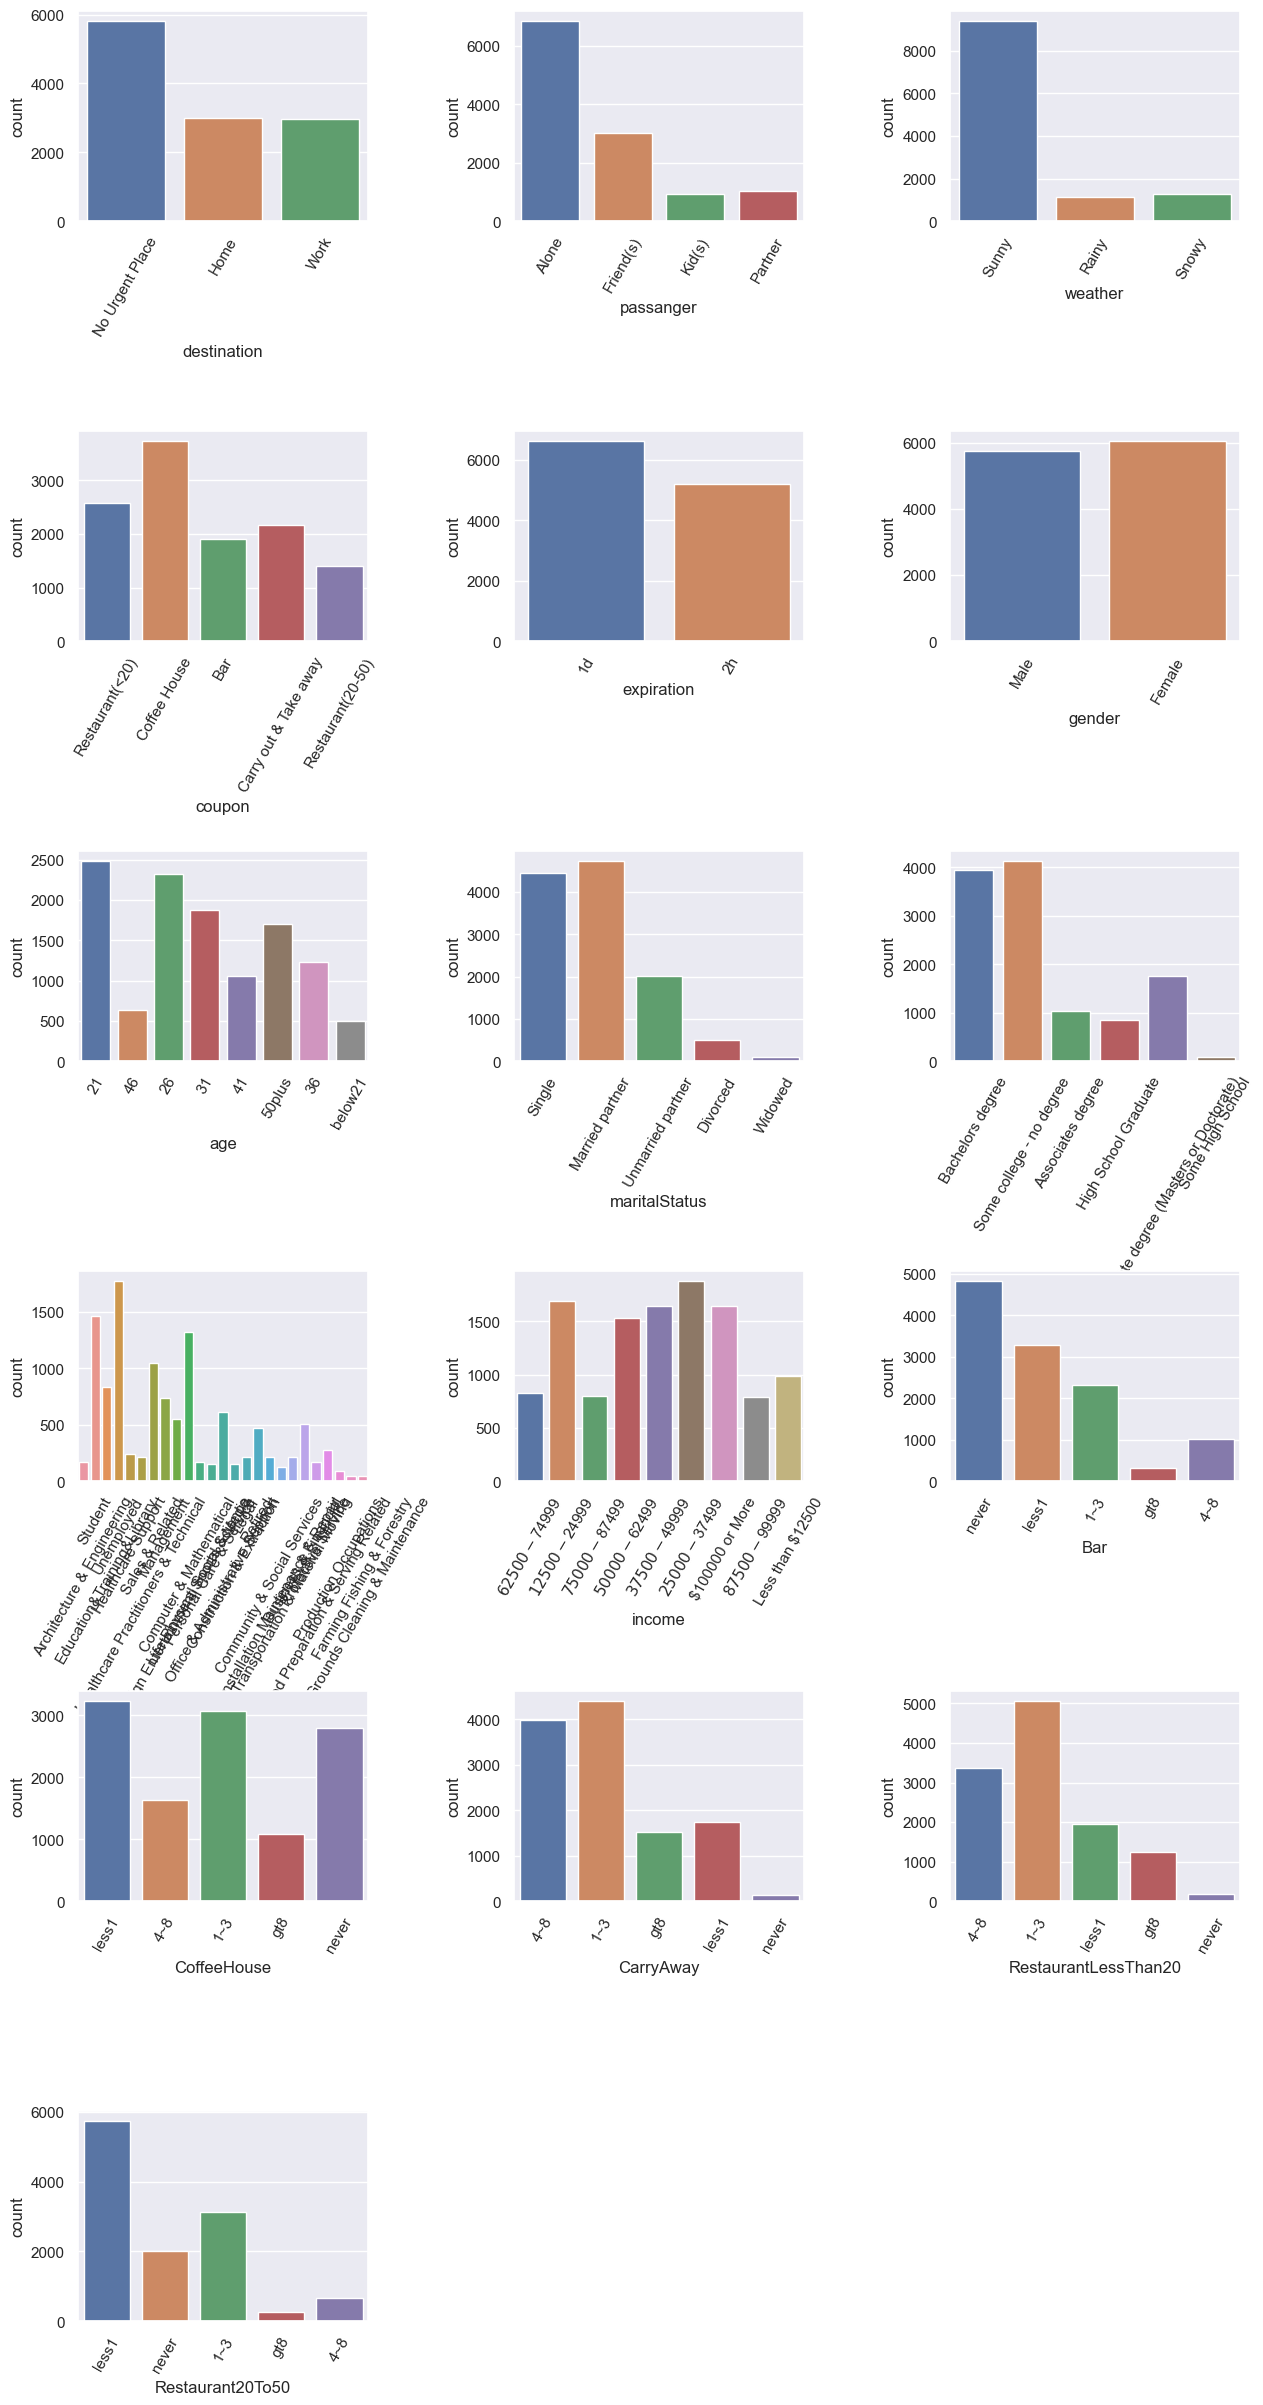

In [14]:
# countplots for all features

plt.figure(figsize=(15, 30))
for i in range(0, 16):
    plt.subplot(6, 3, i+1)
    plt.xticks(rotation = 60)
    sns.countplot(data = df, x = obj1[i])
    
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=0.5)

## 1. Accept

1    6686
0    5111
Name: Accept, dtype: int64


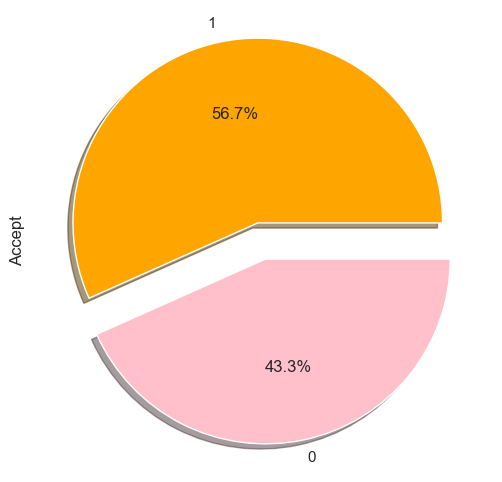

In [15]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
df['Accept'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['Orange','pink'])
print(df['Accept'].value_counts())

In [16]:
percentage_coupon_accepted = round((df['Accept'].value_counts()[1] / df['Accept'].count()) * 100)
print("percentage of accepted coupon %:", percentage_coupon_accepted)

percentage of accepted coupon %: 57


## 2. destination

In [17]:
df['destination'].value_counts()

No Urgent Place    5811
Home               3010
Work               2976
Name: destination, dtype: int64

In [18]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['destination'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                0       1
destination                    
No Urgent Place  36.79%  63.21%
All              43.32%  56.68%
Home             49.37%  50.63%
Work             49.97%  50.03%


In [19]:
result = df.groupby(['Accept', 'destination']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept      destination  Count  Percentage
0       0             Home   1486   29.074545
1       0  No Urgent Place   2138   41.831344
2       0             Work   1487   29.094111
3       1             Home   1524   22.793898
4       1  No Urgent Place   3673   54.935687
5       1             Work   1489   22.270416


<Axes: xlabel='destination', ylabel='Count'>

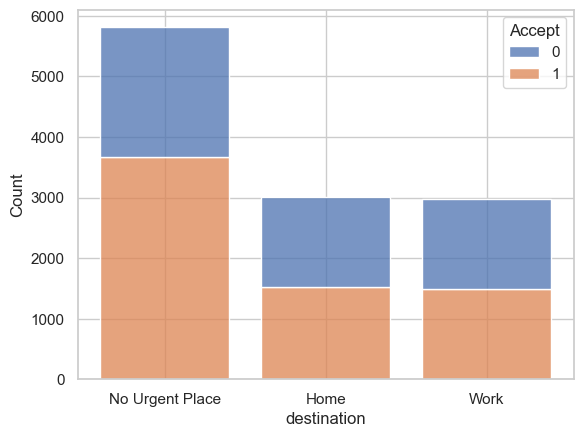

In [20]:
sns.histplot(data=df, x="destination", hue="Accept", multiple="stack", shrink=.8)

#### observatiion Destination

- No urgent Place has highest acceptance rate
- out of total rejected coupons No urgent place has high rejection count but the percentage of rejection is less which is good

## 3. passanger

In [21]:
df['passanger'].value_counts()

Alone        6845
Friend(s)    3020
Partner      1017
Kid(s)        915
Name: passanger, dtype: int64

In [22]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['passanger'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)
cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept          0       1
passanger                
Friend(s)  32.52%  67.48%
Partner    40.71%  59.29%
All        43.32%  56.68%
Alone      47.49%  52.51%
Kid(s)     50.71%  49.29%


In [23]:
result = df.groupby(['Accept', 'passanger']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept  passanger  Count  Percentage
0       0      Alone   3251   63.607905
1       0  Friend(s)    982   19.213461
2       0     Kid(s)    464    9.078458
3       0    Partner    414    8.100176
4       1      Alone   3594   53.754113
5       1  Friend(s)   2038   30.481603
6       1     Kid(s)    451    6.745438
7       1    Partner    603    9.018845


<Axes: xlabel='passanger', ylabel='Count'>

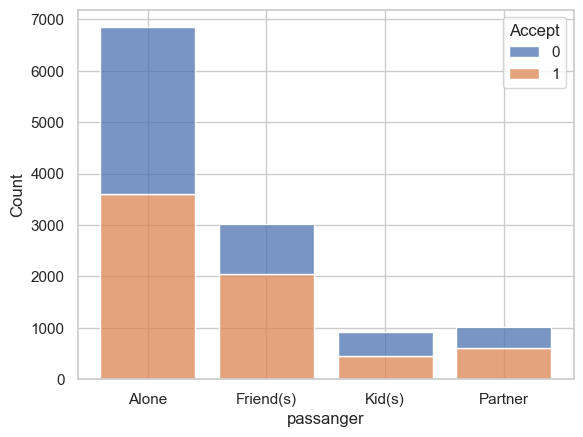

In [24]:
sns.histplot(data=df, x="passanger", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- the number of individuals approached, individuals travelling with friends and partner tend to accept coupons more

In [25]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

## 4. weather

In [26]:
df['weather'].value_counts()

Sunny    9399
Snowy    1259
Rainy    1139
Name: weather, dtype: int64

In [27]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['weather'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept        0       1
weather                
Sunny    40.65%  59.35%
All      43.32%  56.68%
Rainy    53.73%  46.27%
Snowy    53.85%  46.15%


In [28]:
result = df.groupby(['Accept', 'weather']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept weather  Count  Percentage
0       0   Rainy    612   11.974173
1       0   Snowy    678   13.265506
2       0   Sunny   3821   74.760321
3       1   Rainy    527    7.882142
4       1   Snowy    581    8.689800
5       1   Sunny   5578   83.428059


<Axes: xlabel='weather', ylabel='Count'>

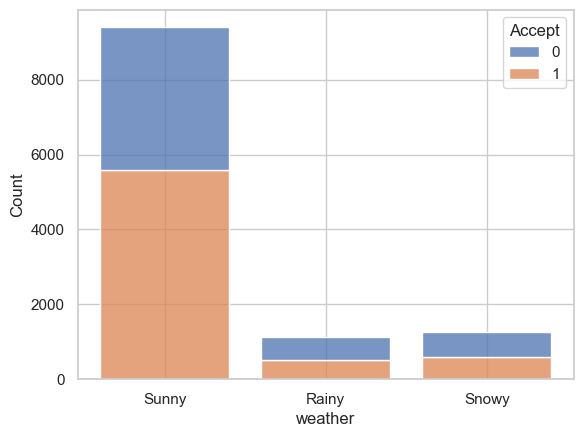

In [29]:
sns.histplot(data=df, x="weather", hue="Accept", multiple="stack", shrink=.8)

#### observation

- acceptance rate for individuals in the sunny atm. is high

## 5. temperature

In [30]:
df['temperature'].value_counts()

80    6027
55    3650
30    2120
Name: temperature, dtype: int64

In [31]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['temperature'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept            0       1
temperature                
80           40.24%  59.76%
All          43.32%  56.68%
55           46.27%  53.73%
30           47.03%  52.97%


In [32]:
result = df.groupby(['Accept', 'temperature']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept  temperature  Count  Percentage
0       0           30    997   19.506946
1       0           55   1689   33.046371
2       0           80   2425   47.446684
3       1           30   1123   16.796291
4       1           55   1961   29.329943
5       1           80   3602   53.873766


<Axes: xlabel='temperature', ylabel='Count'>

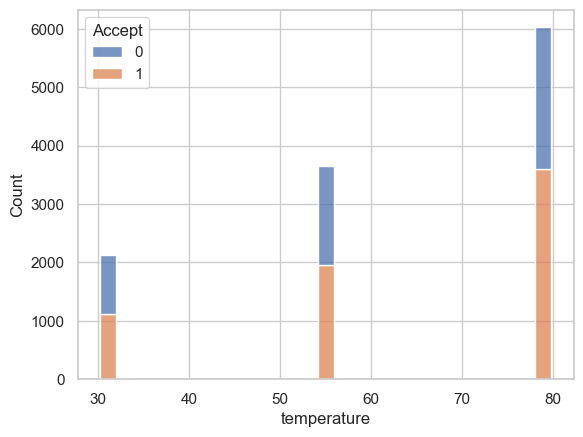

In [33]:
sns.histplot(data=df, x="temperature", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- no significant impact of temperature

## 6. coupon

In [34]:
df['coupon'].value_counts()

Coffee House             3735
Restaurant(<20)          2576
Carry out & Take away    2168
Bar                      1906
Restaurant(20-50)        1412
Name: coupon, dtype: int64

In [35]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['coupon'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                      0       1
coupon                               
Carry out & Take away  26.61%  73.39%
Restaurant(<20)        28.73%  71.27%
All                    43.32%  56.68%
Coffee House           50.63%  49.37%
Restaurant(20-50)      55.38%  44.62%
Bar                    58.81%  41.19%


In [36]:
result = df.groupby(['Accept', 'coupon']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept                 coupon  Count  Percentage
0       0                    Bar   1121   21.933086
1       0  Carry out & Take away    577   11.289376
2       0           Coffee House   1891   36.998630
3       0      Restaurant(20-50)    782   15.300333
4       0        Restaurant(<20)    740   14.478576
5       1                    Bar    785   11.740951
6       1  Carry out & Take away   1591   23.795992
7       1           Coffee House   1844   27.580018
8       1      Restaurant(20-50)    630    9.422674
9       1        Restaurant(<20)   1836   27.460365


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

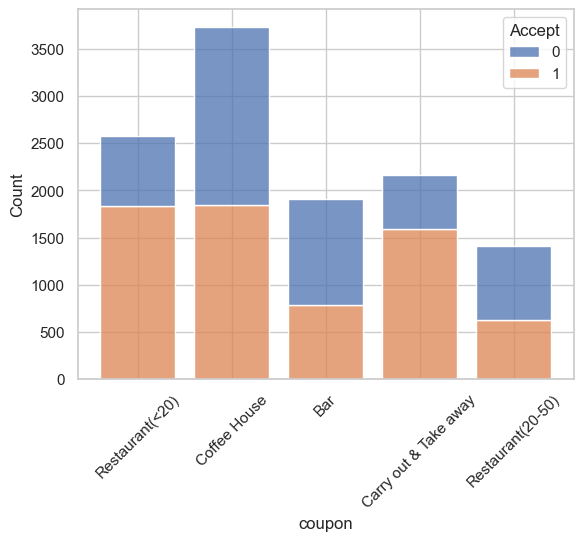

In [37]:
sns.histplot(data=df, x="coupon", hue="Accept", multiple="stack", shrink=.8)
plt.xticks(rotation = 45)

#### Observation

- Coupons for Carry out & Take away, Restaurant(<20) has high acceptance rate

## 7. expiration

In [38]:
df['expiration'].value_counts()

1d    6615
2h    5182
Name: expiration, dtype: int64

In [39]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['expiration'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept           0       1
expiration                
1d          37.55%  62.45%
All         43.32%  56.68%
2h          50.69%  49.31%


In [40]:
result = df.groupby(['Accept', 'expiration']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept expiration  Count  Percentage
0       0         1d   2484   48.601057
1       0         2h   2627   51.398943
2       1         1d   4131   61.785821
3       1         2h   2555   38.214179


<Axes: xlabel='expiration', ylabel='Count'>

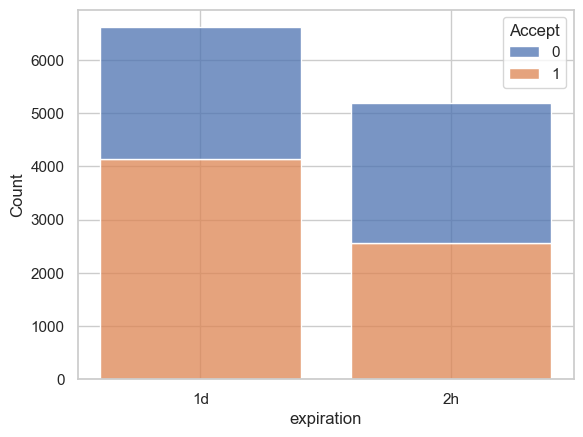

In [41]:
sns.histplot(data=df, x="expiration", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- acceptance rate for coupon with 1d validty is high

## 8. gender

In [42]:
df['gender'].value_counts()

Female    6047
Male      5750
Name: gender, dtype: int64

In [43]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['gender'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept       0       1
gender                
Male    40.99%  59.01%
All     43.32%  56.68%
Female  45.54%  54.46%


In [44]:
result = df.groupby(['Accept', 'gender']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept  gender  Count  Percentage
0       0  Female   2754   53.883780
1       0    Male   2357   46.116220
2       1  Female   3293   49.252169
3       1    Male   3393   50.747831


<Axes: xlabel='gender', ylabel='Count'>

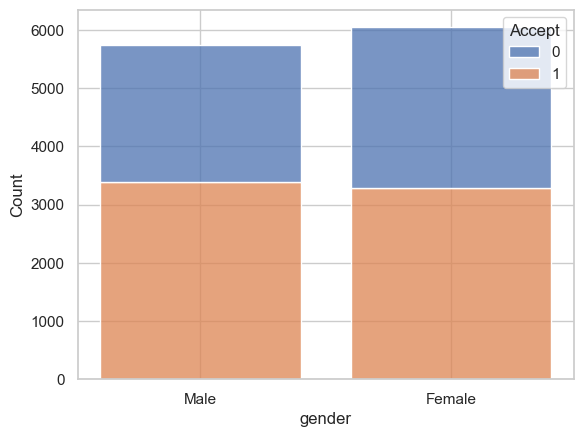

In [45]:
sns.histplot(data=df, x="gender", hue="Accept", multiple="stack", shrink=.8)

#### observation

- no significant impact

## 9. age

In [46]:
df['age'].value_counts()

21         2483
26         2329
31         1872
50plus     1701
36         1227
41         1052
46          638
below21     495
Name: age, dtype: int64

In [47]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['age'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept        0       1
age                    
below21  37.17%  62.83%
26       40.27%  59.73%
21       40.80%  59.20%
41       42.49%  57.51%
46       42.63%  57.37%
All      43.32%  56.68%
31       45.03%  54.97%
36       46.54%  53.46%
50plus   49.56%  50.44%


<Axes: xlabel='age', ylabel='Count'>

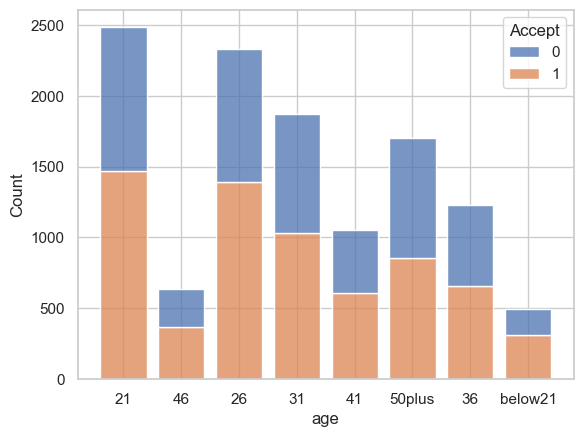

In [48]:
sns.histplot(data=df, x="age", hue="Accept", multiple="stack", shrink=.8)

- More younger the high acceptance rate for coupons

In [49]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

## 10. maritalStatus

In [50]:
df['maritalStatus'].value_counts()

Married partner      4731
Single               4448
Unmarried partner    2018
Divorced              493
Widowed               107
Name: maritalStatus, dtype: int64

In [51]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['maritalStatus'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                  0       1
maritalStatus                    
Single             39.16%  60.84%
All                43.32%  56.68%
Unmarried partner  44.75%  55.25%
Married partner    45.97%  54.03%
Divorced           47.67%  52.33%
Widowed            52.34%  47.66%


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Unmarried partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

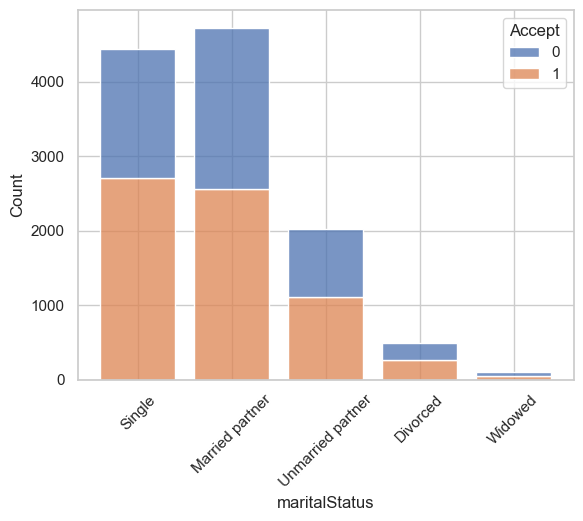

In [52]:
sns.histplot(data=df, x="maritalStatus", hue="Accept", multiple="stack", shrink=.8)
plt.xticks(rotation = 45)

#### Observation

- Widowed and Divorced have low acceptance rate
- Singles have a little high acceptance rate

## 11. has_children

In [53]:
df['has_children'].value_counts()

0    6961
1    4836
Name: has_children, dtype: int64

In [54]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['has_children'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept             0       1
has_children                
0             41.36%  58.64%
All           43.32%  56.68%
1             46.15%  53.85%


In [55]:
result = df.groupby(['Accept', 'has_children']).size().reset_index(name='Count')
total_count = result.groupby('Accept')['Count'].transform('sum')
result['Percentage'] = (result['Count'] / total_count) * 100
print(result)

   Accept  has_children  Count  Percentage
0       0             0   2879   56.329485
1       0             1   2232   43.670515
2       1             0   4082   61.052946
3       1             1   2604   38.947054


<Axes: xlabel='has_children', ylabel='Count'>

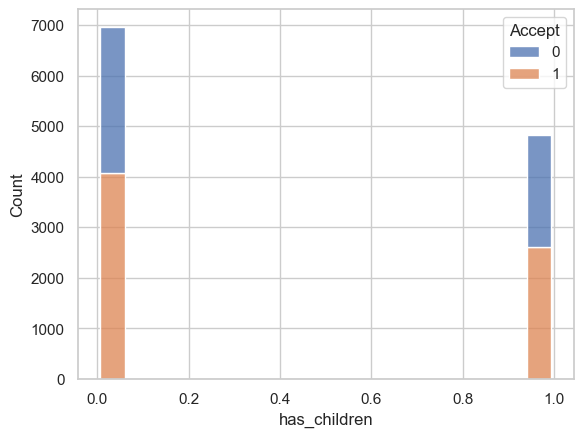

In [56]:
sns.histplot(data=df, x="has_children", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- people with no children has a very little more acceptance rate
- not so relevant difference 

## 12. education

In [57]:
df['education'].value_counts()

Some college - no degree                  4130
Bachelors degree                          3939
Graduate degree (Masters or Doctorate)    1749
Associates degree                         1040
High School Graduate                       852
Some High School                            87
Name: education, dtype: int64

In [58]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['education'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                                       0       1
education                                             
Some High School                        28.74%  71.26%
Some college - no degree                40.70%  59.30%
High School Graduate                    40.85%  59.15%
All                                     43.32%  56.68%
Bachelors degree                        44.61%  55.39%
Associates degree                       44.90%  55.10%
Graduate degree (Masters or Doctorate)  47.63%  52.37%


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bachelors degree'),
  Text(1, 0, 'Some college - no degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

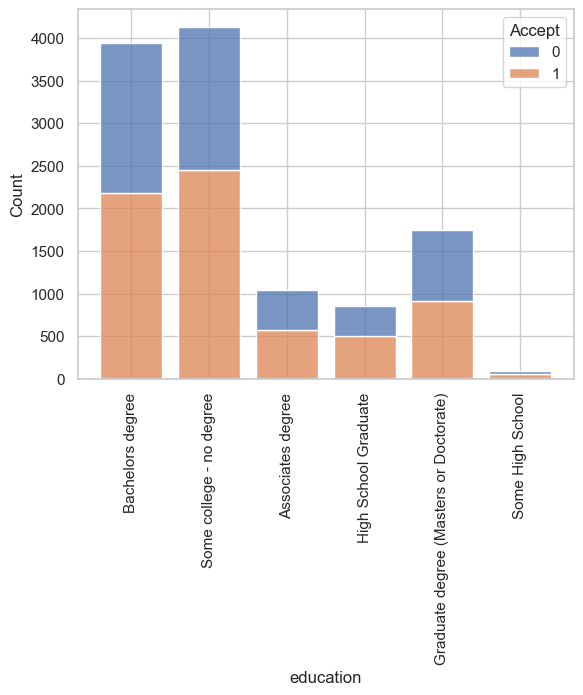

In [59]:
sns.histplot(data=df, x="education", hue="Accept", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

#### Observation

- acceptance rate is high for individual with Some High School education i.e lower the education higher the acceptance

## 13. occupation

In [60]:
df['occupation'].value_counts()

Unemployed                                   1773
Student                                      1464
Computer & Mathematical                      1321
Sales & Related                              1045
Education&Training&Library                    834
Management                                    741
Office & Administrative Support               610
Arts Design Entertainment Sports & Media      553
Business & Financial                          508
Retired                                       467
Food Preparation & Serving Related            272
Healthcare Support                            237
Legal                                         218
Healthcare Practitioners & Technical          215
Transportation & Material Moving              214
Community & Social Services                   214
Protective Service                            172
Architecture & Engineering                    172
Life Physical Social Science                  168
Construction & Extraction                     150


In [61]:
# occupation column has too many distinct values, so we will try to reduce them on the basis of acceptance rate

crosstab_result= pd.crosstab(columns=[df.Accept],index=[df.occupation],margins=True,normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                                          0       1
occupation                                               
Healthcare Practitioners & Technical       29.30%  70.70%
Production Occupations                     29.89%  70.11%
Healthcare Support                         29.96%  70.04%
Construction & Extraction                  31.33%  68.67%
Architecture & Engineering                 36.05%  63.95%
Protective Service                         36.05%  63.95%
Student                                    39.48%  60.52%
Office & Administrative Support            40.00%  60.00%
Management                                 40.62%  59.38%
Transportation & Material Moving           41.12%  58.88%
Life Physical Social Science               42.26%  57.74%
Building & Grounds Cleaning & Maintenance  42.86%  57.14%
Business & Financial                       43.11%  56.89%
All                                        43.32%  56.68%
Sales & Related                            43.44%  56.56%
Food Preparati

## 14. income

In [62]:
df['income'].value_counts()

$25000 - $37499     1878
$12500 - $24999     1692
$37500 - $49999     1647
$100000 or More     1645
$50000 - $62499     1531
Less than $12500     986
$62500 - $74999      826
$75000 - $87499      802
$87500 - $99999      790
Name: income, dtype: int64

In [63]:
# occupation column has too many distinct values, so we will try to reduce them on the basis of acceptance rate

crosstab_result= pd.crosstab(columns=[df.Accept],index=[df.income],margins=True,normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                 0       1
income                          
$25000 - $37499   40.52%  59.48%
$50000 - $62499   41.21%  58.79%
Less than $12500  41.99%  58.01%
$100000 or More   42.31%  57.69%
$12500 - $24999   42.38%  57.62%
$37500 - $49999   43.23%  56.77%
All               43.32%  56.68%
$62500 - $74999   47.46%  52.54%
$87500 - $99999   48.23%  51.77%
$75000 - $87499   50.75%  49.25%


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$62500 - $74999'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$75000 - $87499'),
  Text(3, 0, '$50000 - $62499'),
  Text(4, 0, '$37500 - $49999'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

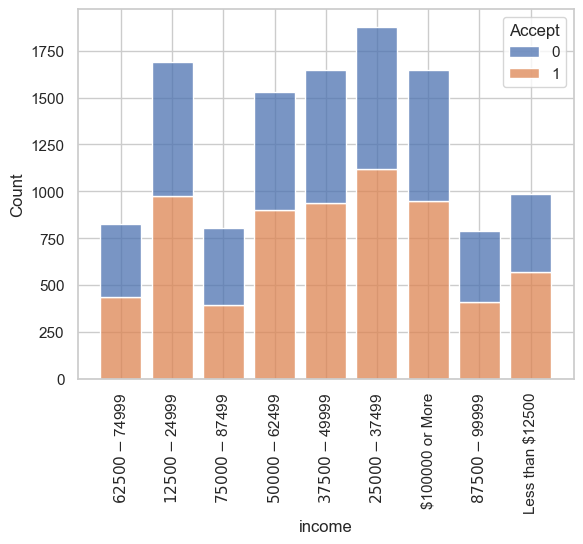

In [64]:
sns.histplot(data=df, x="income", hue="Accept", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

#### observation

- individuals earning between 62500 - 99999 has acceptance rate below the mean acceptance

In [65]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

## 15. Bar

In [66]:
df['Bar'].value_counts()

never    4830
less1    3296
1~3      2331
4~8      1024
gt8       316
Name: Bar, dtype: int64

In [67]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Bar'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept       0       1
Bar                   
4~8     36.72%  63.28%
1~3     37.71%  62.29%
gt8     42.72%  57.28%
All     43.32%  56.68%
less1   43.33%  56.67%
never   47.47%  52.53%


<Axes: xlabel='Bar', ylabel='Count'>

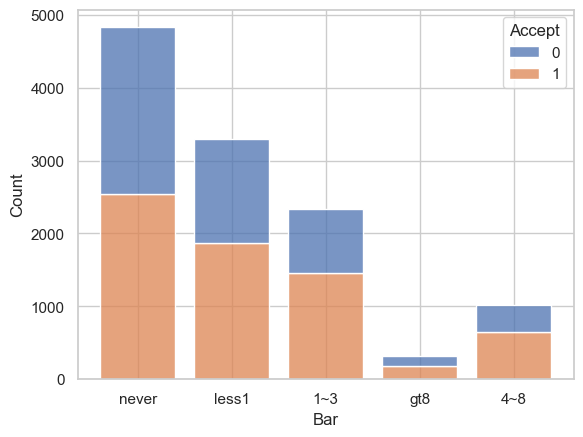

In [68]:
sns.histplot(data=df, x="Bar", hue="Accept", multiple="stack", shrink=.8)

#### observation

- if the frequency of people visting to bar is intermediate then the acceptance rate is high (1 - 8) and less frequency has low acceptance rate

## 16. CoffeeHouse

In [69]:
df['CoffeeHouse'].value_counts()

less1    3226
1~3      3073
never    2786
4~8      1629
gt8      1083
Name: CoffeeHouse, dtype: int64

In [70]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['CoffeeHouse'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept            0       1
CoffeeHouse                
1~3          35.05%  64.95%
4~8          37.02%  62.98%
gt8          41.74%  58.26%
All          43.32%  56.68%
less1        44.92%  55.08%
never        54.92%  45.08%


<Axes: xlabel='CoffeeHouse', ylabel='Count'>

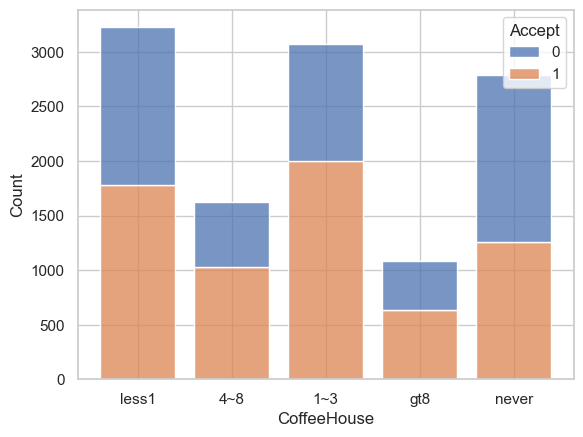

In [71]:
sns.histplot(data=df, x="CoffeeHouse", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- if the frequency of people visting to CoffeHouse is intermediate then the acceptance rate is high (1 - 8) and less frequency has low acceptance rate

## 17. CarryAway

In [72]:
df['CarryAway'].value_counts()

1~3      4404
4~8      3998
less1    1753
gt8      1514
never     128
Name: CarryAway, dtype: int64

In [73]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['CarryAway'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept          0       1
CarryAway                
1~3        41.92%  58.08%
gt8        42.21%  57.79%
4~8        42.32%  57.68%
All        43.32%  56.68%
never      46.09%  53.91%
less1      49.91%  50.09%


<Axes: xlabel='CarryAway', ylabel='Count'>

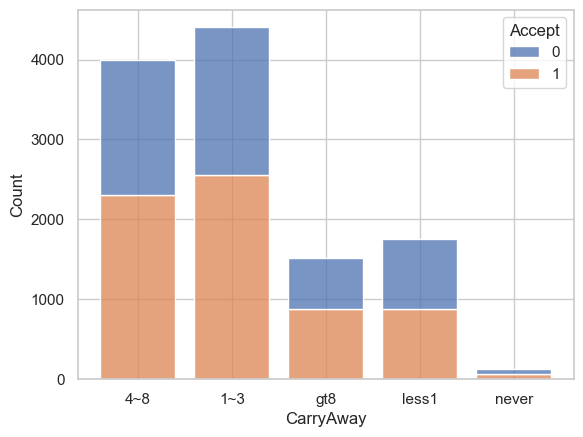

In [74]:
sns.histplot(data=df, x="CarryAway", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- Individuals having less frequncy of visting CarryAway joints tends to accept less coupouns offered

## 18. RestaurantLessThan20

In [75]:
df['RestaurantLessThan20'].value_counts()

1~3      5058
4~8      3366
less1    1948
gt8      1253
never     172
Name: RestaurantLessThan20, dtype: int64

In [76]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['RestaurantLessThan20'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                     0       1
RestaurantLessThan20                
gt8                   39.43%  60.57%
never                 41.86%  58.14%
4~8                   41.95%  58.05%
All                   43.32%  56.68%
1~3                   44.05%  55.95%
less1                 46.46%  53.54%


<Axes: xlabel='RestaurantLessThan20', ylabel='Count'>

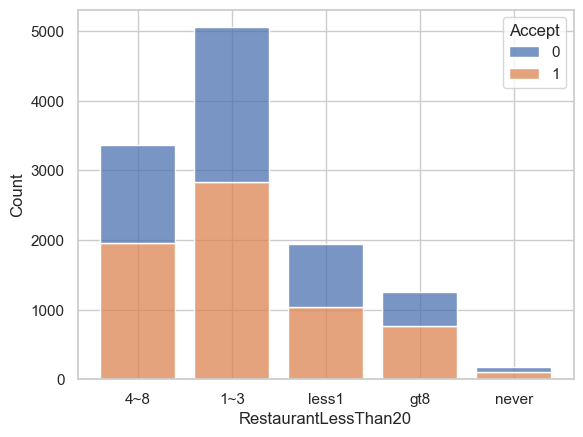

In [77]:
sns.histplot(data=df, x="RestaurantLessThan20", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- people who visit more than 8 time, never, 4-8 times have acceptance% more than mean %, though the difference isnt that significant

## 19. Restaurant20To50

In [78]:
df['Restaurant20To50'].value_counts()

less1    5733
1~3      3117
never    2017
4~8       676
gt8       254
Name: Restaurant20To50, dtype: int64

In [79]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Restaurant20To50'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                 0       1
Restaurant20To50                
gt8               33.07%  66.93%
4~8               34.62%  65.38%
1~3               40.62%  59.38%
All               43.32%  56.68%
less1             44.39%  55.61%
never             48.69%  51.31%


<Axes: xlabel='Restaurant20To50', ylabel='Count'>

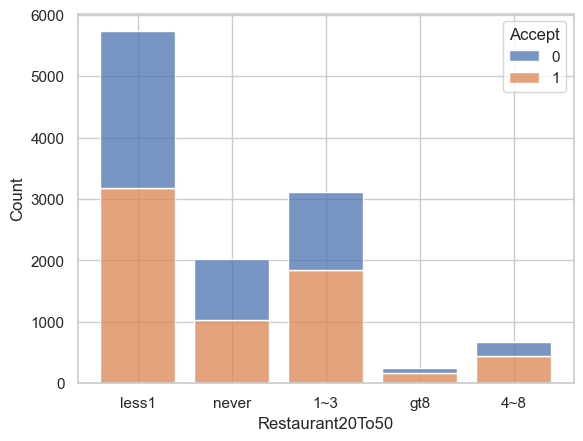

In [80]:
sns.histplot(data=df, x="Restaurant20To50", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- Here, greater the frequency greater the acceptance rate

## 20. toCoupon_GEQ5min

In [81]:
df['toCoupon_GEQ5min'].value_counts()

1    11797
Name: toCoupon_GEQ5min, dtype: int64

<Axes: xlabel='toCoupon_GEQ5min', ylabel='Count'>

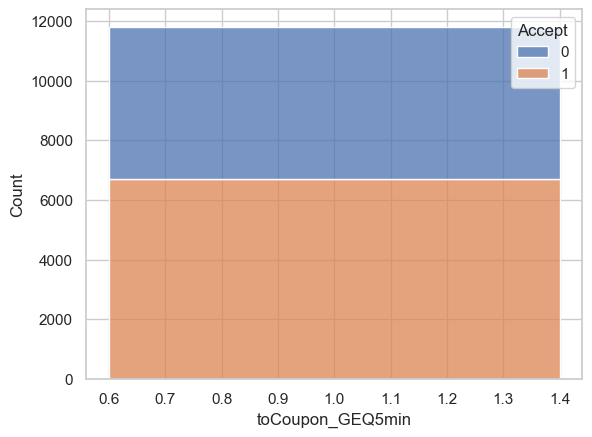

In [82]:
sns.histplot(data=df, x="toCoupon_GEQ5min", hue="Accept", multiple="stack", shrink=.8)

## 21. toCoupon_GEQ15min

In [83]:
df['toCoupon_GEQ15min'].value_counts()

1    6648
0    5149
Name: toCoupon_GEQ15min, dtype: int64

In [84]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['toCoupon_GEQ15min'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                  0       1
toCoupon_GEQ15min                
0                  38.45%  61.55%
All                43.32%  56.68%
1                  47.10%  52.90%


<Axes: xlabel='toCoupon_GEQ15min', ylabel='Count'>

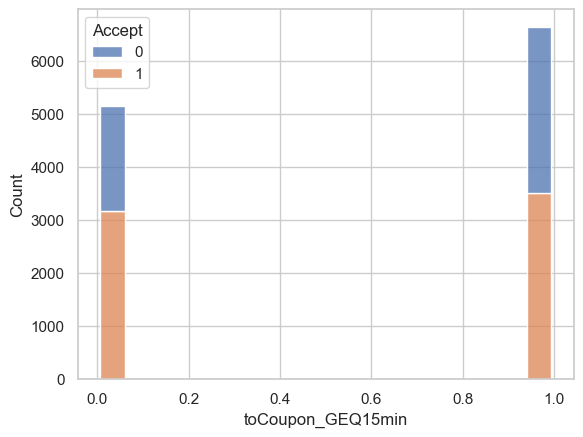

In [85]:
sns.histplot(data=df, x="toCoupon_GEQ15min", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- lesser the time required, higher the acceptance rate

## 22. toCoupon_GEQ25min

In [86]:
df['toCoupon_GEQ25min'].value_counts()

0    10401
1     1396
Name: toCoupon_GEQ25min, dtype: int64

In [87]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['toCoupon_GEQ25min'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                  0       1
toCoupon_GEQ25min                
0                  41.42%  58.58%
All                43.32%  56.68%
1                  57.52%  42.48%


<Axes: xlabel='toCoupon_GEQ25min', ylabel='Count'>

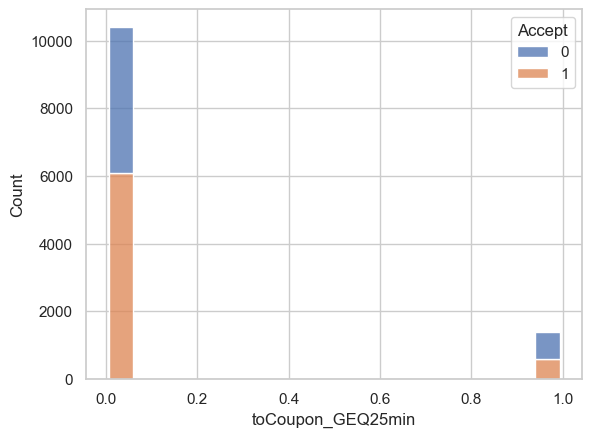

In [88]:
sns.histplot(data=df, x="toCoupon_GEQ25min", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- Greater the time required, lesser the acceptance rate

## 23. direction_same

In [89]:
df['direction_same'].value_counts()

0    9272
1    2525
Name: direction_same, dtype: int64

In [90]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['direction_same'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept               0       1
direction_same                
1               41.78%  58.22%
All             43.32%  56.68%
0               43.74%  56.26%


<Axes: xlabel='direction_same', ylabel='Count'>

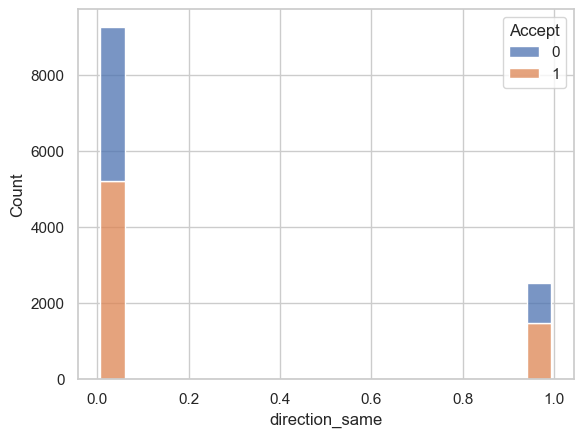

In [91]:
sns.histplot(data=df, x="direction_same", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- not much of impact

## 24. direction_opp

In [92]:
df['direction_opp'].value_counts()

1    9272
0    2525
Name: direction_opp, dtype: int64

In [93]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['direction_opp'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept              0       1
direction_opp                
0              41.78%  58.22%
All            43.32%  56.68%
1              43.74%  56.26%


<Axes: xlabel='direction_opp', ylabel='Count'>

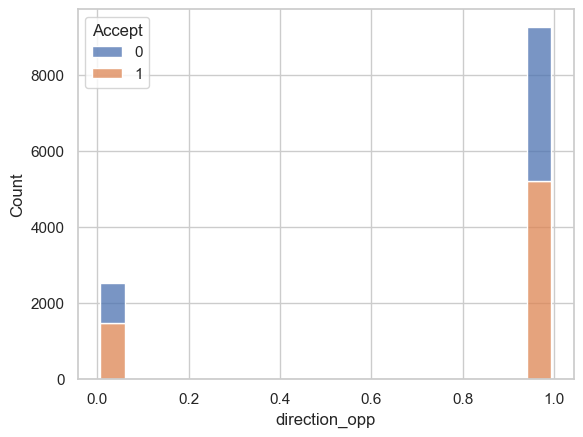

In [94]:
sns.histplot(data=df, x="direction_opp", hue="Accept", multiple="stack", shrink=.8)

In [95]:
df.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
temperature,1.000000,-0.017325,NaN,-0.141441,-0.229433,0.089145,-0.089145,0.059408
has_children,-0.017325,1.000000,NaN,0.079845,-0.011883,-0.033653,0.033653,-0.047590
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.141441,0.079845,NaN,1.000000,0.322419,-0.299591,0.299591,-0.086502
toCoupon_GEQ25min,-0.229433,-0.011883,NaN,0.322419,1.000000,-0.191183,0.191183,-0.104963
direction_same,0.089145,-0.033653,NaN,-0.299591,-0.191183,1.000000,-1.000000,0.016243
direction_opp,-0.089145,0.033653,NaN,0.299591,0.191183,-1.000000,1.000000,-0.016243
Accept,0.059408,-0.047590,NaN,-0.086502,-0.104963,0.016243,-0.016243,1.000000


#### Observation

- not much of impact

## Major Observations and further steps to be carried out on basis of part 1

- Car column has already been dropped due to 99% null values

- toCoupon_GEQ5min feature has only one value i.e 1 so we will drop it as it wont add any value

- feature related to direction of travel are correlated so we will be dropping direction_opp and we will drop direction_same as highly imbalanced

-  Creating new column 'Age', (below21,21,26) -> young, (31, 36, 41, 46) -> mid_age, (above50) -> older

- Creating new column 'Income' , below 49999 - low income, above 50000 - mid income, we will not go for high income as High income individuals wont only be attracted by coupons and for these going to food places may vary on several other factors, can be for mid income level too but for now lets consider earlir

- we will create new feature based on education, criteria High school(low_education)<college(low_education)<1st_degree(mid_education)<High_degree(high_education), low_education < mid_eduction < high_education, Creating new feature by using logic statement for durantion required to travel

- creating new feature on basis of occupation and %acceptance of coupon, criteria - above 60% > High, 50-59.99% > Medium, below 49.99 > low acceptance

- Creating new feature by time required, we want to know if we offer a coupon to an individual does he accept it if he is the regular visitor to that category of place

- 

# Recoding of features

In [96]:
# Creating new column 'Age' 
# (below21,21,26) -> young
# (31, 36, 41, 46) -> mid_age
# (above50) -> older

df.loc[df['age'] == 'below21', 'Age'] = 'young' 
df.loc[df['age'] == '21', 'Age'] = 'young' 
df.loc[df['age'] == '26', 'Age'] = 'young' 
df.loc[df['age'] == '31', 'Age'] = 'mid_age' 
df.loc[df['age'] == '36', 'Age'] = 'mid_age' 
df.loc[df['age'] == '41', 'Age'] = 'mid_age' 
df.loc[df['age'] == '46', 'Age'] = 'mid_age'
df.loc[df['age'] == '50plus', 'Age'] = 'older'

In [97]:
# dropping age column

df = df.drop(columns='age')

In [98]:
# Creating new column 'Income' 

# below 49999 - low income
# above 50000 - mid income

# we will not go for high income as High income individuals wont only be attracted by coupons and for these going to food places may vary on several other factors, can be for mid income level too but for now lets consider earlir

df.loc[df['income'] == 'Less than $12500','Income'] = 'Low'
df.loc[df['income'] == '$12500 - $24999', 'Income'] = 'Low'
df.loc[df['income'] == '$25000 - $37499','Income'] = 'Low'
df.loc[df['income'] == '$37500 - $49999', 'Income'] = 'Low'
df.loc[df['income'] == '$50000 - $62499', 'Income'] = 'Mid'
df.loc[df['income'] == '$62500 - $74999', 'Income'] = 'Mid'
df.loc[df['income'] == '$75000 - $87499','Income'] = 'Mid'
df.loc[df['income'] == '$87500 - $99999', 'Income'] = 'Mid'
df.loc[df['income'] == '$100000 or More', 'Income'] = 'Mid'

In [99]:
# dropping income column

df = df.drop(columns='income')

In [100]:
# we will create new feature based on education

# criteria High school(low_education)<college(low_education)<1st_degree(mid_education)<High_degree(high_education)

# low_education < mid_eduction < high_education

#Creating new feature by using logic statement for durantion required to travel
 
df.loc[df['education'] == 'Some High School', 'Level_of_education'] = 'low_education' 
df.loc[df['education'] == 'High School Graduate', 'Level_of_education'] = 'low_education' 
df.loc[df['education'] == 'Some college - no degree', 'Level_of_education'] = 'low_education' 
df.loc[df['education'] == 'Associates degree', 'Level_of_education'] = 'mid_education' 
df.loc[df['education'] == 'Bachelors degree', 'Level_of_education'] = 'mid_education' 
df.loc[df['education'] == 'Graduate degree (Masters or Doctorate)', 'Level_of_education'] = 'high_education' 

In [101]:
# dropping education column

df = df.drop(columns='education')

In [102]:
# creating new feature on basis of occupation and %acceptance of coupon

# criteria - =above 60% > High, 50-59.99% > Medium, below 49.99 > low acceptance

cross_tab = pd.crosstab(columns=[df['Accept']], index=[df['occupation']], margins=True, normalize='index')

# Calculating the acceptance percentage and categorize it
cross_tab['Acceptance%'] = cross_tab[1] * 100  # Calculate the acceptance percentage

# criteria for categorization
def categorize_acceptance(percentage):
    if percentage >= 60:
        return 'High'
    elif 50 <= percentage <= 59.99:
        return 'Medium'
    else:
        return 'Low'

# Applying the categorization function to the 'Acceptance%' column
cross_tab['Occupation_with_(1)%'] = cross_tab['Acceptance%'].apply(categorize_acceptance)

# Merging the 'Acceptance%' and 'Occupation_with_(1)%' columns back into the 'df' DataFrame based on 'occupation'
df = df.merge(cross_tab[['Acceptance%', 'Occupation_with_(1)%']], left_on='occupation', right_index=True, how='left')

In [103]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,maritalStatus,has_children,occupation,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept,Age,Income,Level_of_education,Acceptance%,Occupation_with_(1)%
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,Single,0,Architecture & Engineering,never,less1,4~8,4~8,less1,1,0,0,0,1,1,young,Mid,mid_education,63.953488,High
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,Single,0,Architecture & Engineering,never,less1,4~8,4~8,less1,1,0,0,0,1,0,young,Mid,mid_education,63.953488,High
2,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Male,Single,0,Architecture & Engineering,never,less1,4~8,4~8,less1,1,0,0,0,1,1,young,Mid,mid_education,63.953488,High
3,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Male,Single,0,Architecture & Engineering,never,less1,4~8,4~8,less1,1,1,0,0,1,0,young,Mid,mid_education,63.953488,High
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Male,Single,0,Architecture & Engineering,never,less1,4~8,4~8,less1,1,0,0,0,1,0,young,Mid,mid_education,63.953488,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11792,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,Single,0,Sales & Related,never,never,1~3,4~8,1~3,1,0,0,1,0,1,young,Mid,mid_education,56.555024,Medium
11793,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,Single,0,Sales & Related,never,never,1~3,4~8,1~3,1,0,0,0,1,1,young,Mid,mid_education,56.555024,Medium
11794,Work,Alone,Snowy,30,Coffee House,1d,Male,Single,0,Sales & Related,never,never,1~3,4~8,1~3,1,0,0,1,0,0,young,Mid,mid_education,56.555024,Medium
11795,Work,Alone,Snowy,30,Bar,1d,Male,Single,0,Sales & Related,never,never,1~3,4~8,1~3,1,1,1,0,1,0,young,Mid,mid_education,56.555024,Medium


In [104]:
df[11000:11100]

,destination,passanger,weather,temperature,coupon,expiration,gender,maritalStatus,has_children,occupation,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept,Age,Income,Level_of_education,Acceptance%,Occupation_with_(1)%
11000,Work,Alone,Sunny,80,Restaurant(20-50),2h,Female,Single,0,Office & Administrative Support,less1,less1,less1,less1,less1,1,0,0,1,0,1,young,Low,mid_education,60.000000,High
11001,No Urgent Place,Kid(s),Sunny,30,Restaurant(20-50),2h,Female,Married partner,1,Unemployed,less1,less1,less1,less1,less1,1,0,0,0,1,0,mid_age,Mid,mid_education,54.032713,Medium
11002,No Urgent Place,Kid(s),Snowy,30,Bar,1d,Female,Married partner,1,Unemployed,less1,less1,less1,less1,less1,1,0,0,0,1,1,mid_age,Mid,mid_education,54.032713,Medium
11003,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,Married partner,1,Unemployed,less1,less1,less1,less1,less1,1,0,0,0,1,0,mid_age,Mid,mid_education,54.032713,Medium
11004,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Female,Married partner,1,Unemployed,less1,less1,less1,less1,less1,1,1,0,0,1,0,mid_age,Mid,mid_education,54.032713,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,No Urgent Place,Alone,Rainy,55,Carry out & Take away,2h,Male,Single,0,Unemployed,1~3,never,4~8,1~3,less1,1,0,0,0,1,1,young,Mid,low_education,54.032713,Medium
11096,No Urgent Place,Alone,Sunny,80,Restaurant(<20),2h,Male,Single,0,Unemployed,1~3,never,4~8,1~3,less1,1,0,0,0,1,0,young,Mid,low_education,54.032713,Medium
11097,No Urgent Place,Alone,Snowy,30,Restaurant(<20),1d,Male,Single,0,Unemployed,1~3,never,4~8,1~3,less1,1,1,0,0,1,1,young,Mid,low_education,54.032713,Medium
11098,Home,Alone,Sunny,80,Carry out & Take away,2h,Male,Single,0,Unemployed,1~3,never,4~8,1~3,less1,1,1,0,1,0,1,young,Mid,low_education,54.032713,Medium


In [105]:
# dropping Acceptance% and occupation column

df = df.drop(['occupation', 'Acceptance%'], axis = 1)

In [106]:
#Creating new feature by time required

df['Coupon_timeRequired_15to25'] = 0 
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'Coupon_timeRequired_15to25'] = 1
df.loc[df['toCoupon_GEQ15min'] == 0, 'Coupon_timeRequired_15to25'] = 0
df.loc[df['toCoupon_GEQ25min'] == 1, 'Coupon_timeRequired_15to25'] = 2

In [107]:
#Dropping columns

df = df.drop(['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1)

In [108]:
# we want to know if we offer a coupon to an individual does he accept it if he is the regular visitor to that category of place

Relative_coupon_Accepted_count = []

for i in range(df.shape[0]):
    if df['coupon'].iloc[i] == 'Restaurant(<20)':
        Relative_coupon_Accepted_count.append(df['RestaurantLessThan20'].iloc[i])
    elif df['coupon'].iloc[i] == 'Coffee House':
        Relative_coupon_Accepted_count.append(df['CoffeeHouse'].iloc[i])
    elif df['coupon'].iloc[i] == 'Carry out & Take away':
        Relative_coupon_Accepted_count.append(df['CarryAway'].iloc[i])
    elif df['coupon'].iloc[i] == 'Bar':
        Relative_coupon_Accepted_count.append(df['Bar'].iloc[i])
    elif df['coupon'].iloc[i] == 'Restaurant(20-50)':
        Relative_coupon_Accepted_count.append(df['Restaurant20To50'].iloc[i])

df['Relative_coupon_Accepted_count'] = Relative_coupon_Accepted_count

In [109]:
# dropping columns

df = df.drop(['Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50'], axis=1)

In [110]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,maritalStatus,has_children,toCoupon_GEQ5min,direction_same,direction_opp,Accept,Age,Income,Level_of_education,Occupation_with_(1)%,Coupon_timeRequired_15to25,Relative_coupon_Accepted_count
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,Single,0,1,0,1,1,young,Mid,mid_education,High,0,4~8
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,Single,0,1,0,1,0,young,Mid,mid_education,High,0,less1
2,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Male,Single,0,1,0,1,1,young,Mid,mid_education,High,0,never
3,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Male,Single,0,1,0,1,0,young,Mid,mid_education,High,1,4~8
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Male,Single,0,1,0,1,0,young,Mid,mid_education,High,0,less1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11792,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,Single,0,1,1,0,1,young,Mid,mid_education,Medium,0,1~3
11793,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,Single,0,1,0,1,1,young,Mid,mid_education,Medium,0,1~3
11794,Work,Alone,Snowy,30,Coffee House,1d,Male,Single,0,1,1,0,0,young,Mid,mid_education,Medium,0,never
11795,Work,Alone,Snowy,30,Bar,1d,Male,Single,0,1,0,1,0,young,Mid,mid_education,Medium,2,never


# EDA: Part 2

In [111]:
# we have two types of data i.e object and int type so seperating them in lists if needed further

obj2 = []
int2 = []

for i in df.columns:
    if df[i].dtypes == 'object':
        obj2.append(i)
    else:
        int2.append(i)

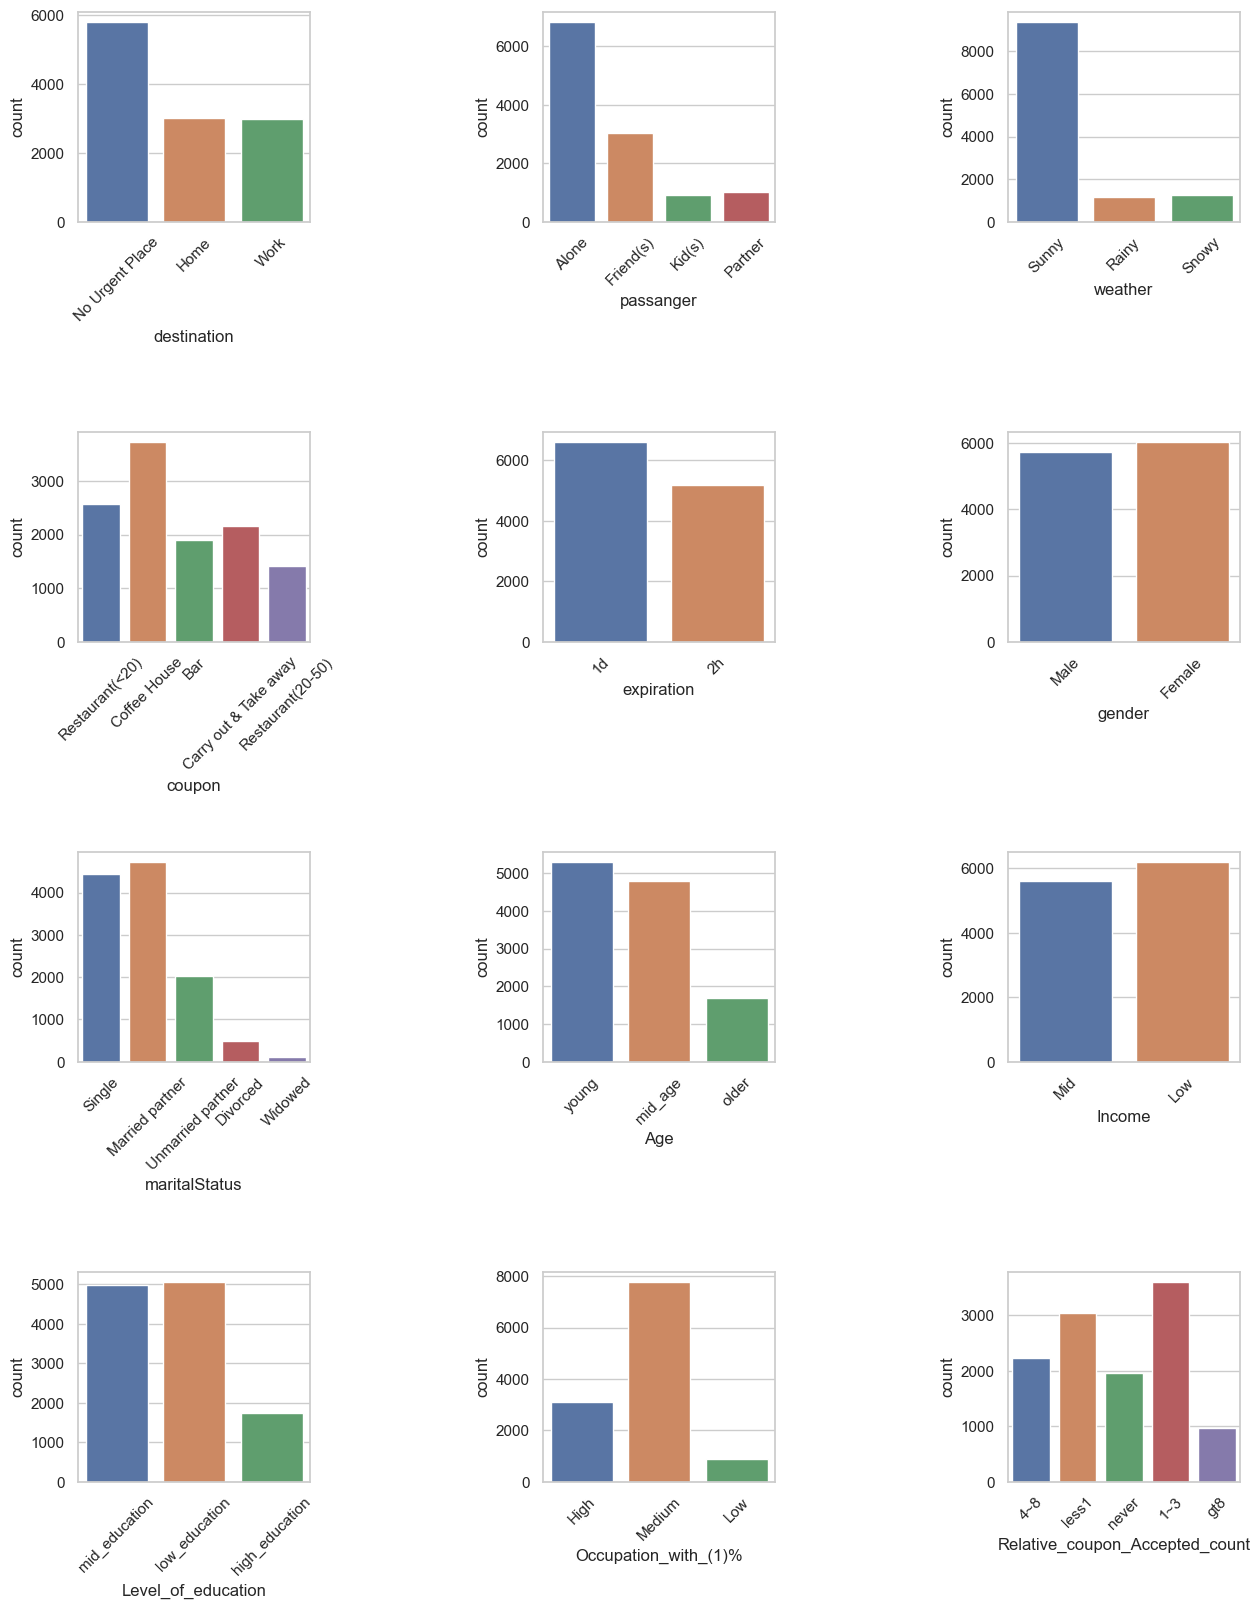

In [112]:
plt.figure(figsize=(15, 30))
for i in range(0, 12):
    plt.subplot(6, 3, i+1)
    plt.xticks(rotation = 45)
    sns.countplot(data = df, x = obj2[i])
    
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)

## 25. Age

In [113]:
df['Age'].value_counts()

young      5307
mid_age    4789
older      1701
Name: Age, dtype: int64

In [114]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Age'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept        0       1
Age                    
young    40.23%  59.77%
All      43.32%  56.68%
mid_age  44.54%  55.46%
older    49.56%  50.44%


<Axes: xlabel='Age', ylabel='Count'>

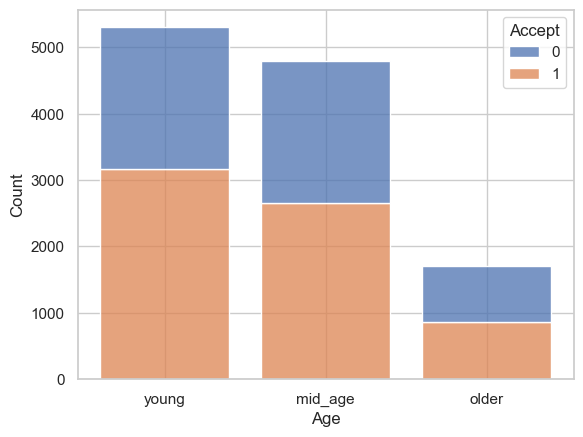

In [115]:
sns.histplot(data=df, x="Age", hue="Accept", multiple="stack", shrink=.8)

#### observation

- not so significant difference but acceptance is little more as compared to others in young age group

## 26. Income

In [116]:
df['Income'].value_counts()

Low    6203
Mid    5594
Name: Income, dtype: int64

In [117]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Income'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept       0       1
Income                
Low     41.98%  58.02%
All     43.32%  56.68%
Mid     44.82%  55.18%


<Axes: xlabel='Income', ylabel='Count'>

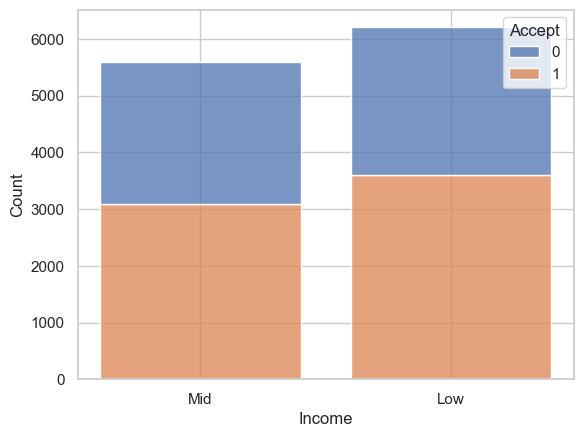

In [118]:
sns.histplot(data=df, x="Income", hue="Accept", multiple="stack", shrink=.8)

#### observation

- no significant difference can be spotted

## 27. Level_of_education

In [119]:
df['Level_of_education'].value_counts()

low_education     5069
mid_education     4979
high_education    1749
Name: Level_of_education, dtype: int64

In [120]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Level_of_education'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                   0       1
Level_of_education                
low_education       40.52%  59.48%
All                 43.32%  56.68%
mid_education       44.67%  55.33%
high_education      47.63%  52.37%


<Axes: xlabel='Level_of_education', ylabel='Count'>

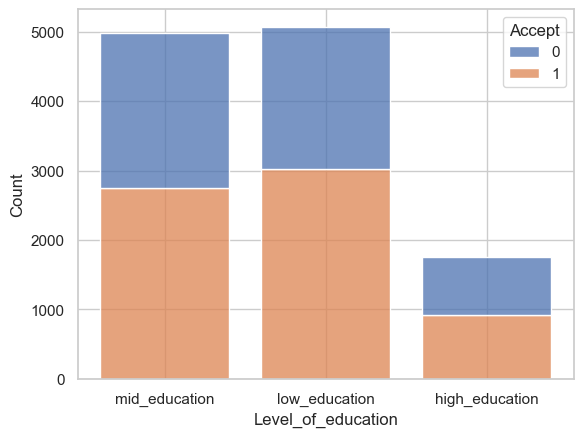

In [121]:
sns.histplot(data=df, x="Level_of_education", hue="Accept", multiple="stack", shrink=.8)

#### observation

- no significant difference can be spotted, but lower education has a little impact on acceptance

## 28. Occupation_with_(1)%

In [122]:
df['Occupation_with_(1)%'].value_counts()

Medium    7791
High      3107
Low        899
Name: Occupation_with_(1)%, dtype: int64

In [123]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Occupation_with_(1)%'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                     0       1
Occupation_with_(1)%                
High                  37.11%  62.89%
All                   43.32%  56.68%
Medium                44.65%  55.35%
Low                   53.28%  46.72%


<Axes: xlabel='Occupation_with_(1)%', ylabel='Count'>

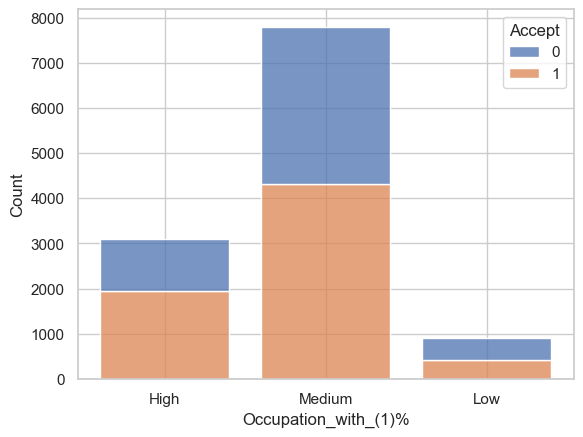

In [124]:
sns.histplot(data=df, x="Occupation_with_(1)%", hue="Accept", multiple="stack", shrink=.8)

#### observation

- new feature on basis of occupation and %acceptance of coupon

- as we have categorized High for occupation with acceptance % more than= to 60, here occuptaion with more acceptance % has high acceptability.

## 29. Coupon_timeRequired_15to25

In [125]:
df['Coupon_timeRequired_15to25'].value_counts()

1    5252
0    5149
2    1396
Name: Coupon_timeRequired_15to25, dtype: int64

In [126]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Coupon_timeRequired_15to25'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                           0       1
Coupon_timeRequired_15to25                
0                           38.45%  61.55%
All                         43.32%  56.68%
1                           44.33%  55.67%
2                           57.52%  42.48%


<Axes: xlabel='Coupon_timeRequired_15to25', ylabel='Count'>

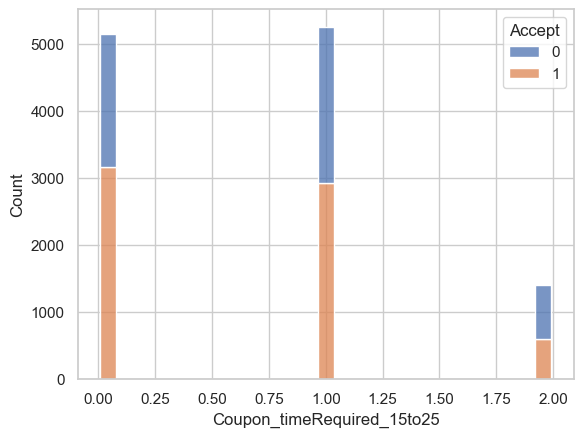

In [127]:
sns.histplot(data=df, x="Coupon_timeRequired_15to25", hue="Accept", multiple="stack", shrink=.8)

#### Observation

- criteria .<15 - 0 .15-25 - 1 .25 - 2

- if less time is required to reach then acceptance of coupon is high

## 30. Relative_coupon_Accepted_count

In [128]:
df['Relative_coupon_Accepted_count'].value_counts()

1~3      3606
less1    3042
4~8      2229
never    1956
gt8       964
Name: Relative_coupon_Accepted_count, dtype: int64

In [129]:
crosstab_result = pd.crosstab(columns=df['Accept'], index=df['Relative_coupon_Accepted_count'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

cross_tab_sorted = formatted_crosstab.sort_values(by=1, ascending=False)
print(cross_tab_sorted)

Accept                               0       1
Relative_coupon_Accepted_count                
4~8                             27.68%  72.32%
gt8                             28.22%  71.78%
1~3                             32.89%  67.11%
All                             43.32%  56.68%
less1                           49.21%  50.79%
never                           78.68%  21.32%


<Axes: xlabel='Relative_coupon_Accepted_count', ylabel='Count'>

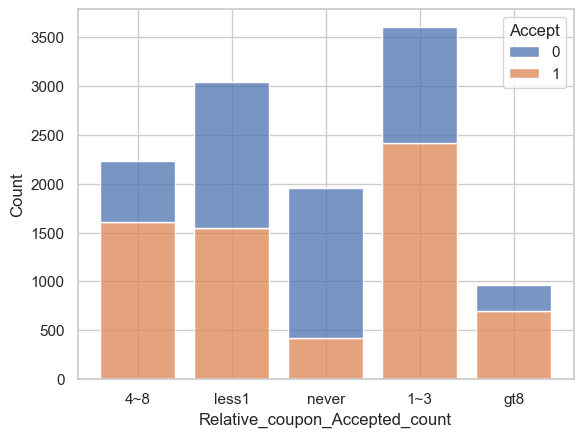

In [130]:
sns.histplot(data=df, x="Relative_coupon_Accepted_count", hue="Accept", multiple="stack", shrink=.8)

#### Observation 

- Higher the frequency of visiting the place and when offered the cooupon for same place it is high probability that individual will accept it

In [131]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'maritalStatus', 'has_children',
       'toCoupon_GEQ5min', 'direction_same', 'direction_opp', 'Accept', 'Age',
       'Income', 'Level_of_education', 'Occupation_with_(1)%',
       'Coupon_timeRequired_15to25', 'Relative_coupon_Accepted_count'],
      dtype='object')

In [132]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,maritalStatus,has_children,toCoupon_GEQ5min,direction_same,direction_opp,Accept,Age,Income,Level_of_education,Occupation_with_(1)%,Coupon_timeRequired_15to25,Relative_coupon_Accepted_count
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,Single,0,1,0,1,1,young,Mid,mid_education,High,0,4~8
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,Single,0,1,0,1,0,young,Mid,mid_education,High,0,less1
2,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Male,Single,0,1,0,1,1,young,Mid,mid_education,High,0,never
3,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Male,Single,0,1,0,1,0,young,Mid,mid_education,High,1,4~8
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Male,Single,0,1,0,1,0,young,Mid,mid_education,High,0,less1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11792,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,Single,0,1,1,0,1,young,Mid,mid_education,Medium,0,1~3
11793,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,Single,0,1,0,1,1,young,Mid,mid_education,Medium,0,1~3
11794,Work,Alone,Snowy,30,Coffee House,1d,Male,Single,0,1,1,0,0,young,Mid,mid_education,Medium,0,never
11795,Work,Alone,Snowy,30,Bar,1d,Male,Single,0,1,0,1,0,young,Mid,mid_education,Medium,2,never


In [133]:
# 'toCoupon_GEQ5min', 'direction_same', 'direction_opp' drop these columns

df = df.drop(['toCoupon_GEQ5min', 'direction_opp', 'direction_same'], axis = 1)

In [134]:
data_vis

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11792,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,1
11793,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
11794,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0
11795,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,1,0,1,0


# EDA: Part 3

In [135]:
data_vis.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

## 31. Individuals travelling partner to certain destination and its impact on coupon acceptance

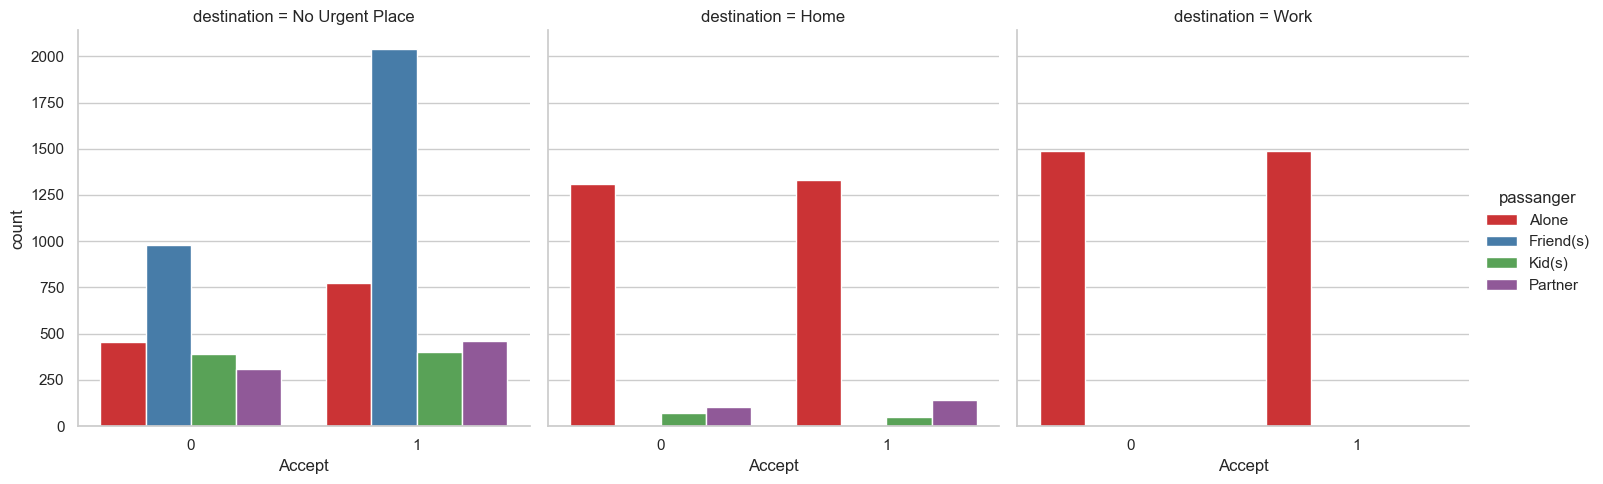

In [136]:
sns.catplot(data=data_vis, x="Accept", hue="passanger", col="destination", kind="count", palette="Set1")

In [137]:

# Calculate the crosstab table
crosstab_result = pd.crosstab(index=df["Accept"], columns=[df["destination"], df["passanger"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

destination    Home                No Urgent Place                           \
passanger     Alone Kid(s) Partner           Alone Friend(s) Kid(s) Partner   
Accept                                                                        
0            11.09%  0.62%   0.89%           3.87%     8.32%  3.31%   2.62%   
1            11.27%  0.43%   1.21%           6.57%    17.28%  3.39%   3.90%   
All          22.36%  1.05%   2.10%          10.43%    25.60%  6.71%   6.52%   

destination    Work      All  
passanger     Alone           
Accept                        
0            12.60%   43.32%  
1            12.62%   56.68%  
All          25.23%  100.00%  


#### Observation

- out of the people who acceptaed coupon

- Alone - 11.27 % travel home, 6.57% travel NUP, 12.62% travel to work but the acceptance ratio for alone is high when they travel to NUP

- Kids - this category is not to be targeted

- Partner - 1.21% travel Home, 3.90% to NUP, so people travelling with partners to destination NUP has high acceptance rate for partner category

- Friends - we found Friends travelled to NUP only and percentage is 17.28 which is high for people who accepted coupons while travelling with companions

## 32. Coupon type accepted on basis of weather

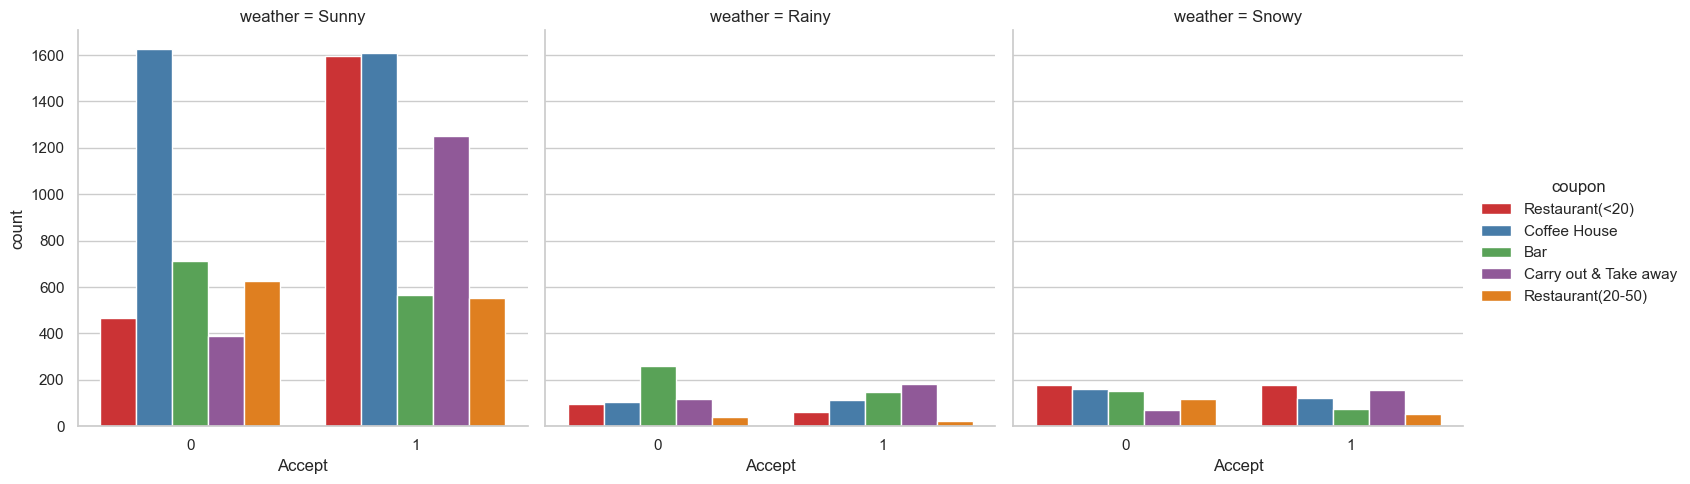

In [138]:
sns.catplot(data=data_vis, x="Accept", hue="coupon", col="weather", kind="count", palette="Set1")

In [139]:

# Calculate the crosstab table
crosstab_result = pd.crosstab(index=df["Accept"], columns=[df["coupon"], df["weather"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon     Bar                Carry out & Take away                 \
weather  Rainy  Snowy   Sunny                 Rainy  Snowy   Sunny   
Accept                                                               
0        2.19%  1.29%   6.03%                 0.99%  0.59%   3.31%   
1        1.25%  0.62%   4.79%                 1.54%  1.32%  10.62%   
All      3.43%  1.91%  10.82%                 2.53%  1.92%  13.93%   

coupon  Coffee House                Restaurant(20-50)                 \
weather        Rainy  Snowy   Sunny             Rainy  Snowy   Sunny   
Accept                                                                 
0              0.88%  1.37%  13.77%             0.33%  0.97%   5.32%   
1              0.94%  1.03%  13.66%             0.20%  0.45%   4.69%   
All            1.82%  2.41%  27.43%             0.53%  1.42%  10.01%   

coupon  Restaurant(<20)                     All  
weather           Rainy  Snowy   Sunny           
Accept                                        

#### Observation

- Out of the total coupons accepted on basis of weather

- CarryAway - Sunny has 10.62%(high)

- Restaurant(<20) - Sunny has 13.66%

- offering only these two coupons makes sense on basis of weather

## 33. Coupon type acceptance on basis of age

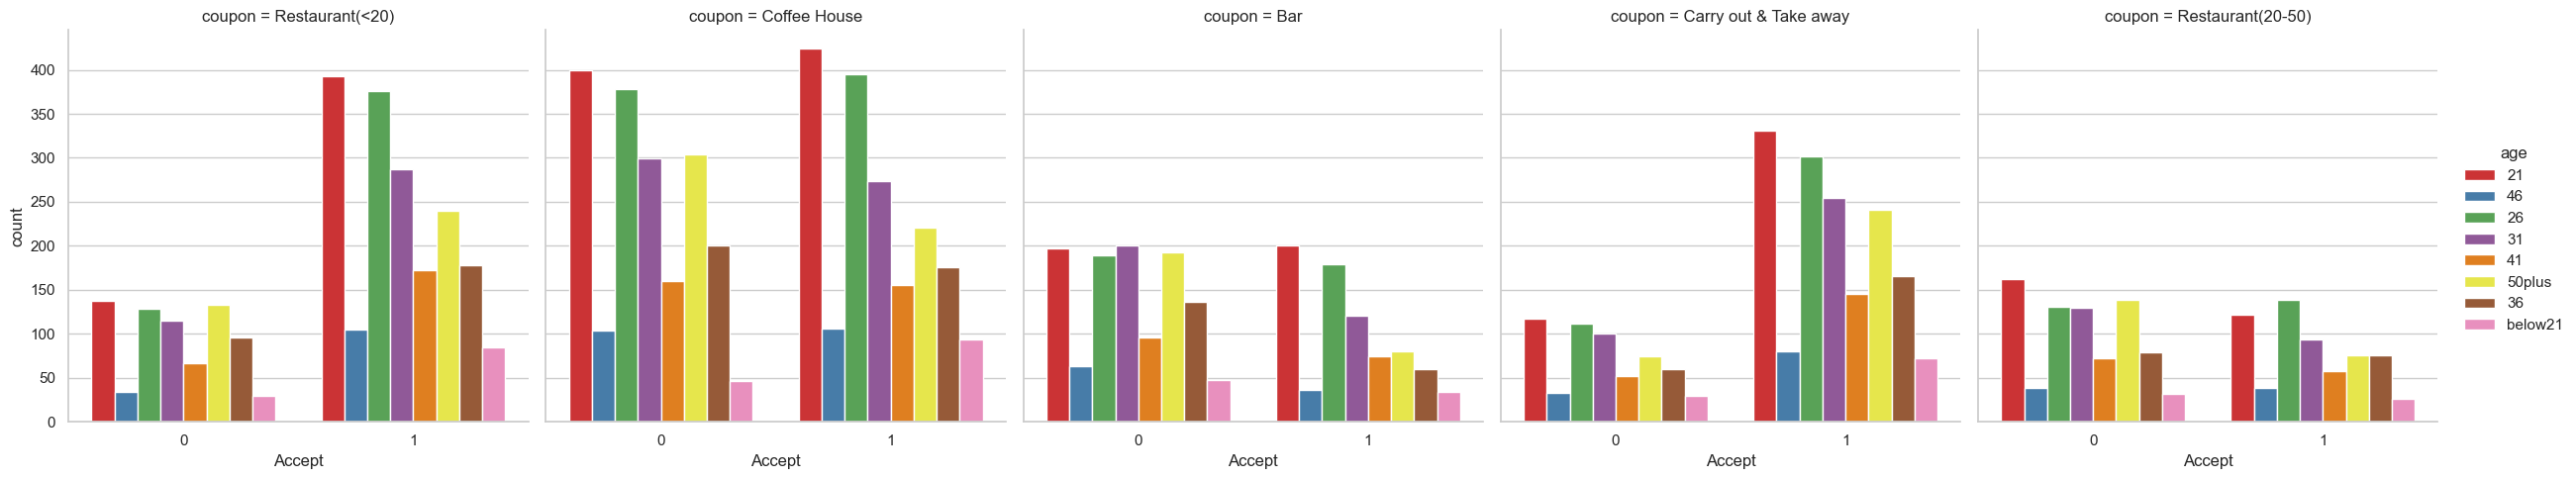

In [140]:
sns.catplot(data=data_vis, x="Accept", hue="age", col="coupon", kind="count", palette="Set1")

In [141]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=data_vis["Accept"], columns=[data_vis["coupon"], data_vis["age"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon    Bar                                                    \
age        21     26     31     36     41     46 50plus below21   
Accept                                                            
0       1.67%  1.60%  1.70%  1.15%  0.81%  0.53%  1.64%   0.40%   
1       1.70%  1.52%  1.03%  0.51%  0.64%  0.31%  0.68%   0.29%   
All     3.37%  3.12%  2.72%  1.66%  1.45%  0.84%  2.31%   0.69%   

coupon Carry out & Take away                                            \
age                       21     26     31     36     41     46 50plus   
Accept                                                                   
0                      0.99%  0.95%  0.85%  0.51%  0.44%  0.28%  0.63%   
1                      2.81%  2.56%  2.15%  1.41%  1.23%  0.68%  2.04%   
All                    3.80%  3.51%  3.00%  1.92%  1.67%  0.96%  2.67%   

coupon         Coffee House                                                    \
age    below21           21     26     31     36     41     46 50plus b

#### Observation

- Doesnt matter the age, out of the people who accepted coupons for Carry out and take away, Visiting Resturant less than or equal to 20 has high acceptance rate

- offering other coupon type except these two to any age wont result into high acceptance rate

## 34. Coupon type acceptance based on of education 

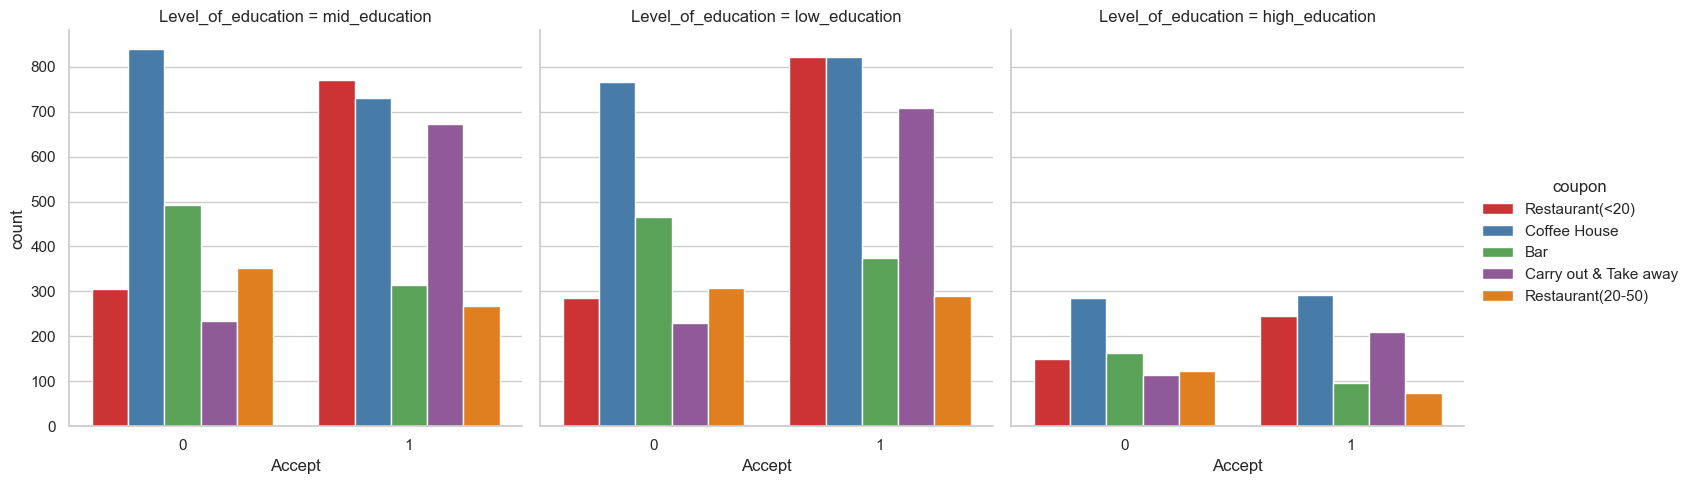

In [142]:
sns.catplot(data=df, x="Accept", hue="coupon", col="Level_of_education", kind="count", palette="Set1")

In [143]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=df["Accept"], columns=[df["coupon"], df["Level_of_education"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon                        Bar                              \
Level_of_education high_education low_education mid_education   
Accept                                                          
0                           1.38%         3.94%         4.18%   
1                           0.81%         3.18%         2.67%   
All                         2.19%         7.12%         6.85%   

coupon             Carry out & Take away                              \
Level_of_education        high_education low_education mid_education   
Accept                                                                 
0                                  0.97%         1.95%         1.98%   
1                                  1.78%         6.00%         5.70%   
All                                2.75%         7.95%         7.68%   

coupon               Coffee House                              \
Level_of_education high_education low_education mid_education   
Accept                                        

#### Observation 

- out of total people accepted coupon based on its type education has a certain impact as follows

- Carry out and take away - 6%(low education)>5.70%(mid_education)

- Resturant20 - 6.96%(low education)>6.53%(mid_level)

- acceptance ration for both types is nearly same, so offer these two types to individuals with low and mid level education

## 35. Coupon type acceptance based on income 

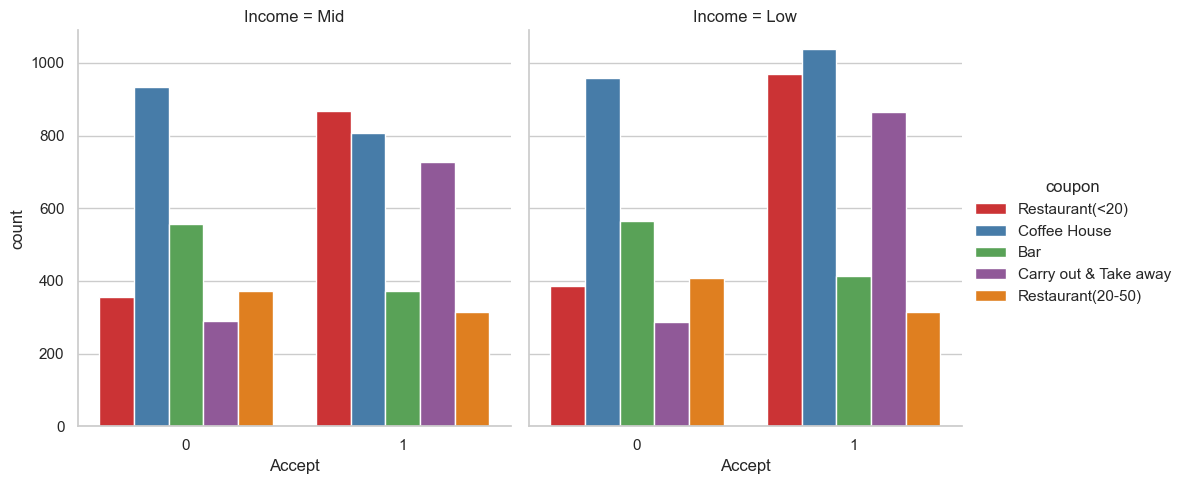

In [144]:
sns.catplot(data=df, x="Accept", hue="coupon", col="Income", kind="count", palette="Set1")

In [145]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=df["Accept"], columns=[df["coupon"], df["Income"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon    Bar        Carry out & Take away        Coffee House          \
Income    Low    Mid                   Low    Mid          Low     Mid   
Accept                                                                   
0       4.78%  4.72%                 2.44%  2.45%        8.12%   7.91%   
1       3.50%  3.15%                 7.32%  6.16%        8.80%   6.83%   
All     8.28%  7.87%                 9.77%  8.61%       16.92%  14.74%   

coupon Restaurant(20-50)        Restaurant(<20)              All  
Income               Low    Mid             Low     Mid           
Accept                                                            
0                  3.47%  3.16%           3.26%   3.01%   43.32%  
1                  2.67%  2.67%           8.21%   7.35%   56.68%  
All                6.14%  5.83%          11.48%  10.36%  100.00%  


#### Observation

- out of the people who accepted specific coupons when offered

- Low and mid income - Carry out and take away has high acceptance % Low>Mid

- Low and mid income - Restaurant<20 - Low>mid

- though the difference in acceptance% for low and mid category of income is not very significant

## 36. Coupon type accepted on basis of Bar frequency

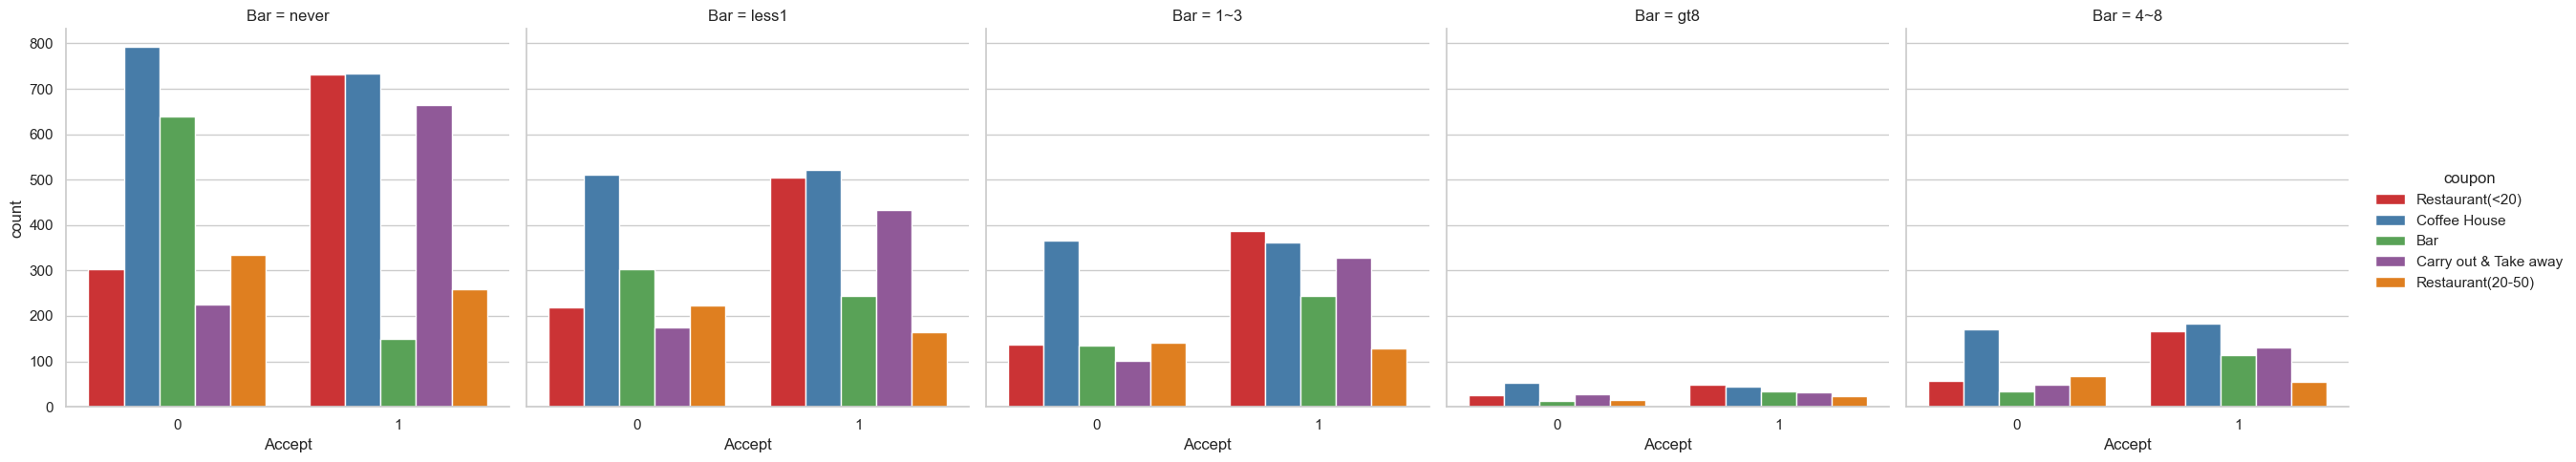

In [146]:
sns.catplot(data=data_vis, x="Accept", hue="coupon", col="Bar", kind="count", palette="Set1")

In [147]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=data_vis["Accept"], columns=[data_vis["coupon"], data_vis["Bar"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon    Bar                             Carry out & Take away                \
Bar       1~3    4~8    gt8  less1  never                   1~3    4~8    gt8   
Accept                                                                          
0       1.14%  0.28%  0.11%  2.56%  5.42%                 0.86%  0.42%  0.23%   
1       2.08%  0.97%  0.28%  2.07%  1.26%                 2.79%  1.11%  0.27%   
All     3.21%  1.25%  0.39%  4.63%  6.68%                 3.65%  1.53%  0.50%   

coupon               Coffee House                               \
Bar     less1  never          1~3    4~8    gt8  less1   never   
Accept                                                           
0       1.47%  1.91%        3.10%  1.44%  0.45%  4.32%   6.71%   
1       3.68%  5.64%        3.07%  1.55%  0.37%  4.42%   6.21%   
All     5.15%  7.54%        6.17%  2.99%  0.82%  8.75%  12.93%   

coupon Restaurant(20-50)                             Restaurant(<20)         \
Bar                  1~3    4~8    gt

#### Observation

- people that never go to bar or who visit only once has accepted coupon for Resturant<20

- people tha visit Bar 1 to 3 have good acceptance% for Bar coupon

- when it comes to coupon related to CaaryAway and Resturant<20 all have high acceptance% except if someone visits Bar greater than 8 times the accept% Resturant<20 coupon or the Bar one or anyother is less`

In [148]:
data_vis.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

## 37. Coupon type accepted on basis of CoffeHouse frequency

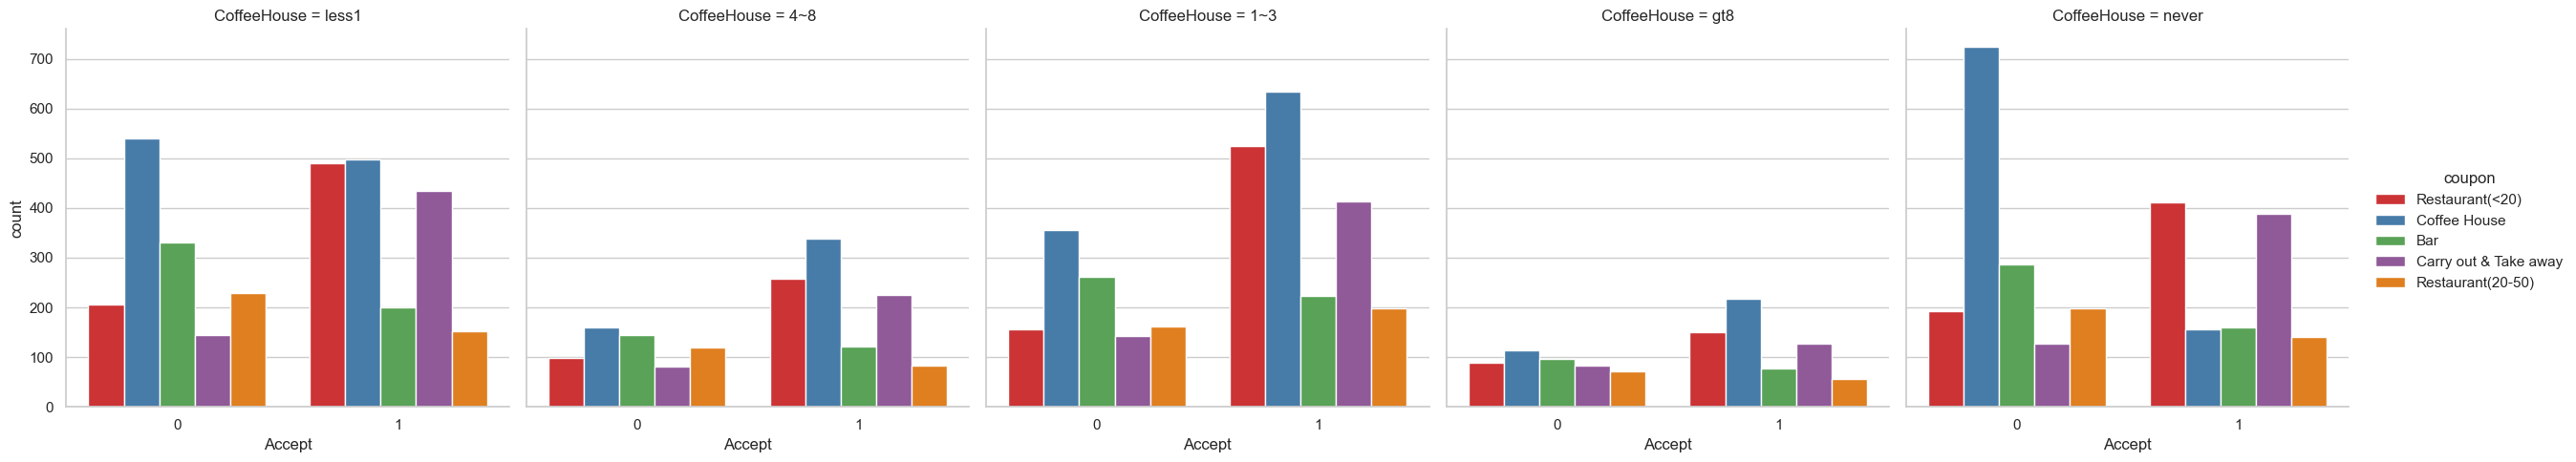

In [149]:
sns.catplot(data=data_vis, x="Accept", hue="coupon", col="CoffeeHouse", kind="count", palette="Set1")

In [150]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=data_vis["Accept"], columns=[data_vis["coupon"], data_vis["CoffeeHouse"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon         Bar                             Carry out & Take away         \
CoffeeHouse    1~3    4~8    gt8  less1  never                   1~3    4~8   
Accept                                                                        
0            2.22%  1.23%  0.81%  2.81%  2.43%                 1.20%  0.69%   
1            1.90%  1.03%  0.66%  1.70%  1.36%                 3.51%  1.91%   
All          4.12%  2.26%  1.47%  4.51%  3.79%                 4.71%  2.59%   

coupon                           Coffee House                              \
CoffeeHouse    gt8  less1  never          1~3    4~8    gt8  less1  never   
Accept                                                                      
0            0.70%  1.22%  1.09%        3.01%  1.35%  0.96%  4.58%  6.14%   
1            1.09%  3.69%  3.30%        5.38%  2.87%  1.85%  4.21%  1.31%   
All          1.78%  4.91%  4.38%        8.39%  4.22%  2.81%  8.79%  7.45%   

coupon      Restaurant(20-50)                             Rest

#### Observation

- people visiting coffee house no matter the visit frequency tend to accept coupon related to CaaryAway, CoffeHouse, Resturant<20

## 38. Coupon type accepted on basis of CarryAway frequency

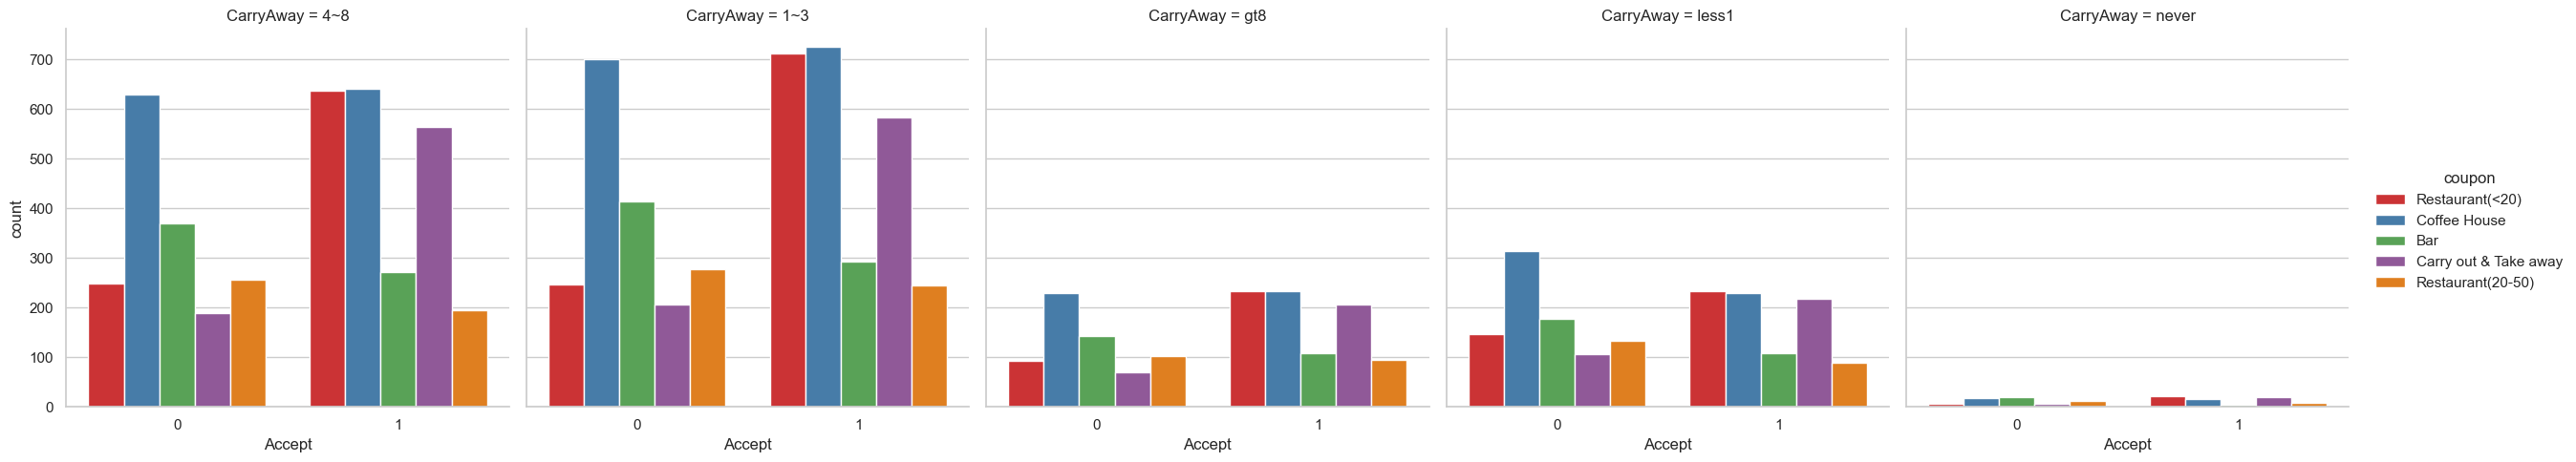

In [151]:
sns.catplot(data=data_vis, x="Accept", hue="coupon", col="CarryAway", kind="count", palette="Set1")

In [152]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=data_vis["Accept"], columns=[data_vis["coupon"], data_vis["CarryAway"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon       Bar                             Carry out & Take away         \
CarryAway    1~3    4~8    gt8  less1  never                   1~3    4~8   
Accept                                                                      
0          3.50%  3.13%  1.21%  1.50%  0.16%                 1.75%  1.59%   
1          2.48%  2.30%  0.92%  0.92%  0.03%                 4.95%  4.77%   
All        5.98%  5.43%  2.14%  2.42%  0.19%                 6.71%  6.37%   

coupon                         Coffee House                               \
CarryAway    gt8  less1  never          1~3     4~8    gt8  less1  never   
Accept                                                                     
0          0.59%  0.90%  0.05%        5.94%   5.34%  1.95%  2.65%  0.14%   
1          1.75%  1.85%  0.17%        6.15%   5.43%  1.98%  1.95%  0.14%   
All        2.34%  2.75%  0.22%       12.09%  10.77%  3.92%  4.60%  0.28%   

coupon    Restaurant(20-50)                             Restaurant(<20)  \
Carry

#### Observation

- greater the frequency of visit to carryaway higher the acceptance rate for the same coupon and Resturant<20

- order - 1-3>4-8>grt8>less1>never

## 39. Coupon type accepted on basis of RestaurantLessThan20 frequency

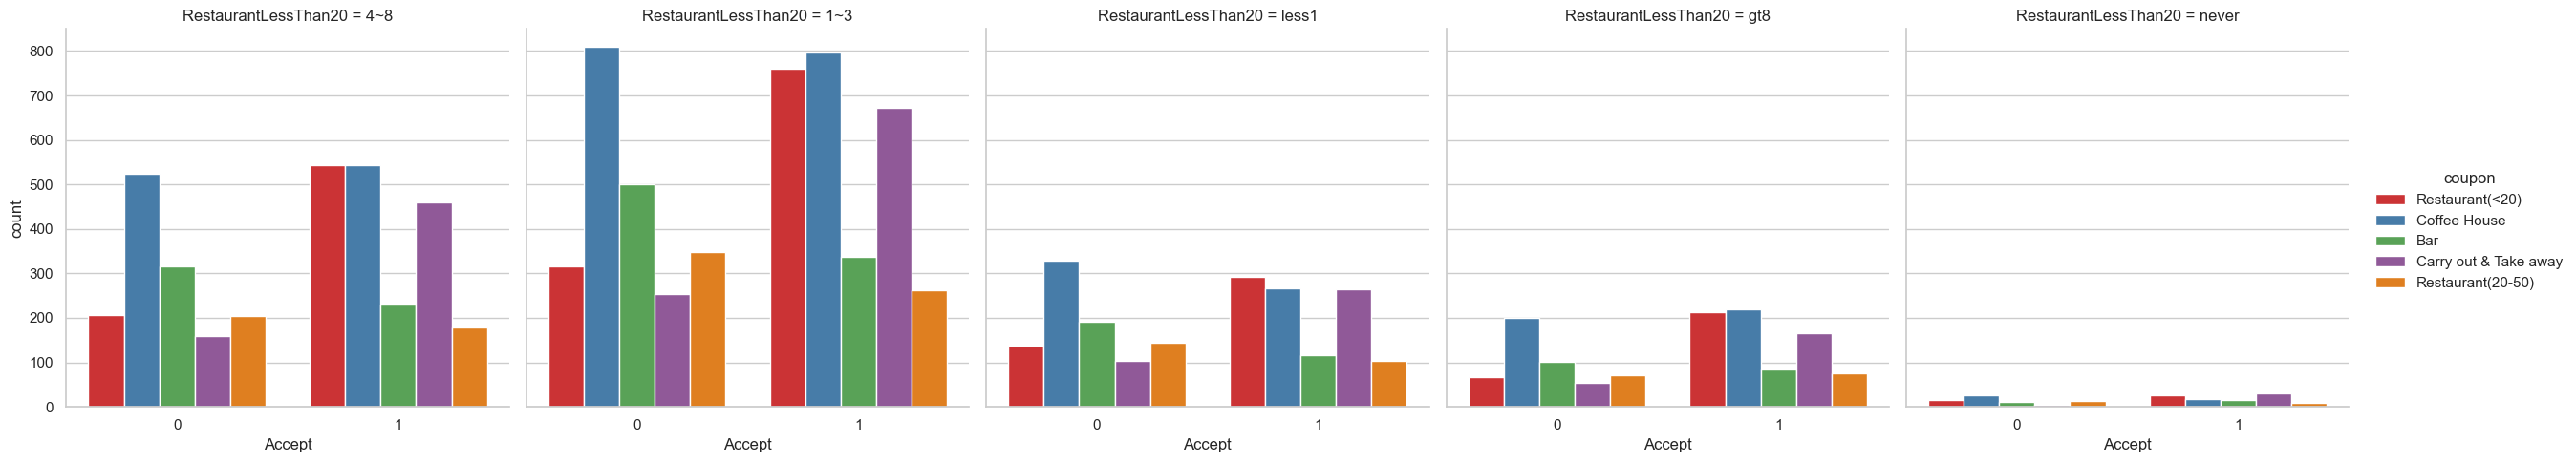

In [153]:
sns.catplot(data=data_vis, x="Accept", hue="coupon", col="RestaurantLessThan20", kind="count", palette="Set1")

In [154]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=data_vis["Accept"], columns=[data_vis["coupon"], data_vis["RestaurantLessThan20"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon                  Bar                             Carry out & Take away  \
RestaurantLessThan20    1~3    4~8    gt8  less1  never                   1~3   
Accept                                                                          
0                     4.25%  2.68%  0.86%  1.62%  0.10%                 2.14%   
1                     2.87%  1.94%  0.72%  0.99%  0.14%                 5.70%   
All                   7.11%  4.62%  1.58%  2.61%  0.24%                 7.84%   

coupon                                           Coffee House                \
RestaurantLessThan20    4~8    gt8  less1  never          1~3    4~8    gt8   
Accept                                                                        
0                     1.36%  0.47%  0.88%  0.04%        6.86%  4.45%  1.70%   
1                     3.89%  1.41%  2.24%  0.25%        6.76%  4.61%  1.86%   
All                   5.25%  1.87%  3.12%  0.30%       13.61%  9.06%  3.56%   

coupon                             Res

#### Observation

- greater the frequency of visit to R<20 higher the acceptance rate for the same coupon and Resturant<20

- order - 1-3>4-8>grt8>less1>never

## 40. Coupon type accepted on basis of Restaurant20To50 frequency

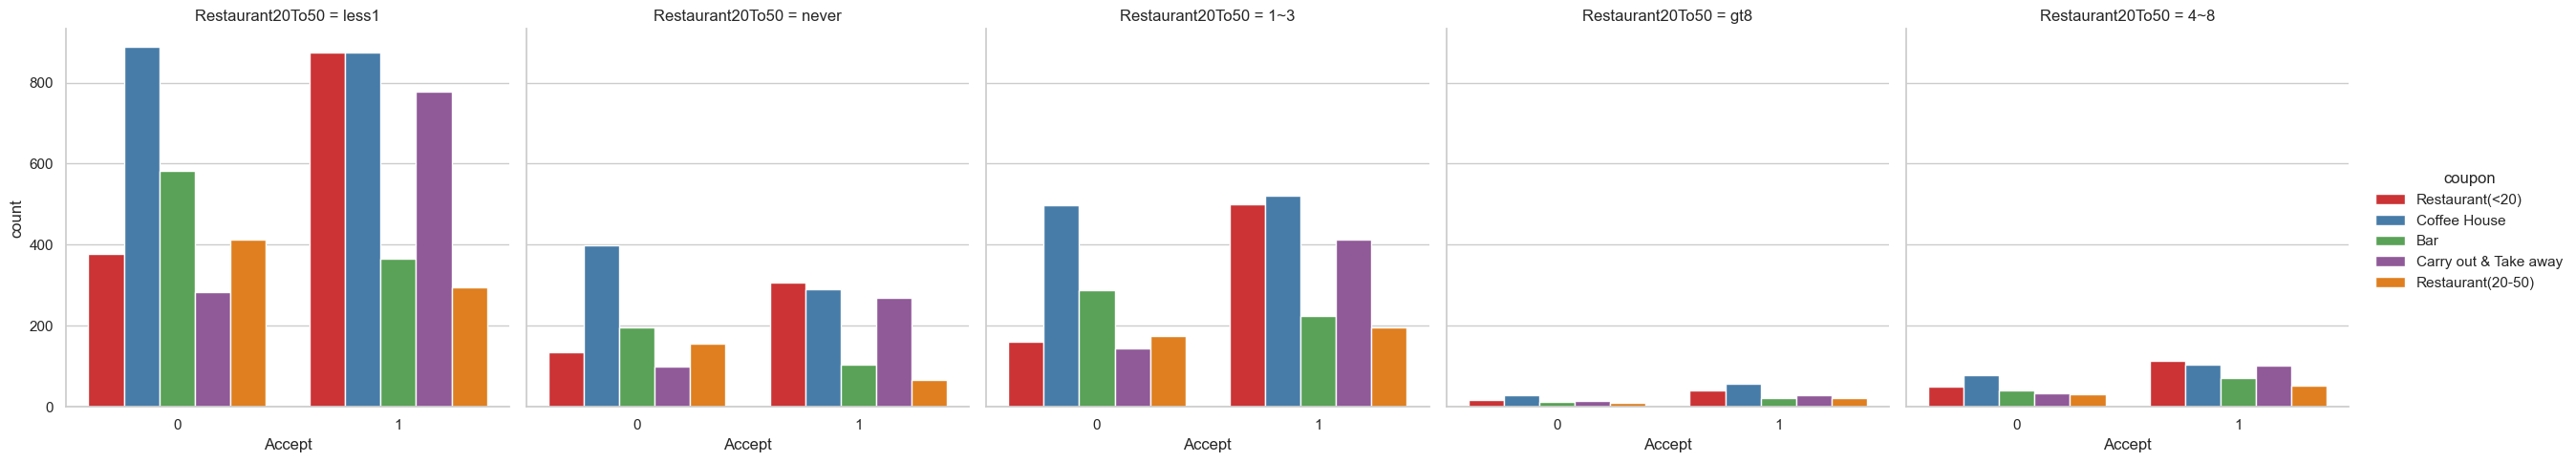

In [155]:
sns.catplot(data=data_vis, x="Accept", hue="coupon", col="Restaurant20To50", kind="count", palette="Set1")

In [156]:
# Calculating the crosstab table
crosstab_result = pd.crosstab(index=data_vis["Accept"], columns=[data_vis["coupon"], data_vis["Restaurant20To50"]], margins=True, normalize='all')

percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

coupon              Bar                             Carry out & Take away  \
Restaurant20To50    1~3    4~8    gt8  less1  never                   1~3   
Accept                                                                      
0                 2.44%  0.35%  0.11%  4.94%  1.66%                 1.23%   
1                 1.90%  0.59%  0.19%  3.10%  0.87%                 3.49%   
All               4.34%  0.94%  0.30%  8.04%  2.53%                 4.72%   

coupon                                       Coffee House                \
Restaurant20To50    4~8    gt8  less1  never          1~3    4~8    gt8   
Accept                                                                    
0                 0.29%  0.13%  2.41%  0.84%        4.22%  0.66%  0.25%   
1                 0.86%  0.25%  6.60%  2.28%        4.41%  0.87%  0.47%   
All               1.15%  0.37%  9.01%  3.12%        8.63%  1.53%  0.72%   

coupon                          Restaurant(20-50)                              \
Resta

#### Observation

- people visiting more frequent to R20to50 dont prefer the coupons for the same as they do for Carryaway and R<20

## Impact of Travel Companions on Coupon Acceptance:
- Alone Travelers: Among individuals traveling alone, approximately 11.27% accepted coupons when heading home, 6.57% when traveling to "No Urgent Place (NUP)," and 12.62% when en route to work. Notably, the acceptance ratio for solo travelers is higher when they travel to "NUP."
- Traveling with Kids: This category does not appear to be a significant target for coupon acceptance.
- Traveling with Partners: Individuals traveling with partners exhibit a 1.21% acceptance rate when heading home and a 3.90% acceptance rate when traveling to "NUP." Traveling with partners to the destination "NUP" results in a high acceptance rate for this category.
- Traveling with Friends: Friends tend to travel to "NUP" destinations, where the acceptance rate is 17.28%, which is notably high among individuals who accepted coupons while traveling with companions.
## Coupon Type Acceptance Based on Weather:
- CarryAway: Coupons for "CarryAway" demonstrate a high acceptance rate of 10.62% on sunny days.
- Restaurant (<20): Coupons for restaurants with prices less than or equal to 20 exhibit a high acceptancerate of 13.66%durinf sunny weather.
- These findings suggest that offering these two types of coupons based on weather conditions is a sensible strategy.
- Coupon Type Acceptance Based on Age:
- Age does not significantly influence coupon acceptance for "Carry Out and Take Away" or visiting restaurants with prices less than or equal to $20

## Coupon Type Acceptance Based on Restaurant20To50 Frequency:
- Preference Shift: Individuals who visit restaurants in the $20-50 price range more frequently do not prefer coupons related to the same establishments. Their acceptance rates for these coupons are lower compared to coupons for "CarryAway" and "Restaurant (<20)."

## Coupon Type Acceptance Based on Age:
- Age does not significantly influence coupon acceptance for "Carry Out and Take Away" or visiting restaurants with prices less than or equal to $20. Both coupon types maintain consistently high acceptance rates across all age groups.
Offering other coupon types, excluding these two, may not result in high acceptance rates across different age groups.

## Coupon Type Acceptance Based on Education:
- Education level appears to impact coupon acceptance for specific types:
- Carry Out and Take Away: An acceptance rate of 6% is observed for individuals with low education compared to 5.70% for those with mid-level education.
- Restaurant (<20): An acceptance rate of 6.96% is observed for individuals with low education compared to 6.53% for those with mid-level education.
- The acceptance ratios for both types are nearly identical, suggesting that offering these two types of coupons to individuals with low and mid-level education is a reasonable approach.
## Coupon Type Acceptance Based on Income:
- For specific coupons when offered:
- Carry Out and Take Away: Low-income individuals exhibit a higher acceptance rate compared to those with mid-income.
- Restaurant (<20): Low-income individuals demonstrate a higher acceptance rate compared to those with mid-income.
## Coupon Type Acceptance Based on Bar Frequency:
- No Bar or Rare Visitors: Individuals who never go to a bar or visit only once tend to accept coupons for "Restaurant (<20)."
- Moderate Bar Visitors (1-3 Times): People who visit bars 1 to 3 times exhibit a good acceptance rate for bar-related coupons.
- Frequent Bar Visitors (4-8 Times): For coupons related to "CarryAway" and "Restaurant (<20)," acceptance rates are generally high among all individuals except those who visit bars more than 8 times. In this case, the acceptance rate for "Restaurant (<20)" coupons or bar-related coupons is lower.
## Coupon Type Acceptance Based on CoffeeHouse Frequency:
- Coffee House Visitors: People who visit coffee houses, regardless of the frequency of their visits, tend to accept coupons related to "CarryAway," "CoffeeHouse," and "Restaurant (<20)."
## Coupon Type Acceptance Based on CarryAway Frequency:
- Increasing Frequency: The greater the frequency of visits to "CarryAway" establishments, the higher the acceptance rate for coupons related to "CarryAway" and "Restaurant (<20)."
- Order of Acceptance: The order of acceptance rates is as follows: 1-3 times > 4-8 times > more than 8 times > less than 1 time > never.
## Coupon Type Acceptance Based on RestaurantLessThan20 Frequency:
- Increasing Frequency: The greater the frequency of visits to restaurants with prices less than $20, the higher the acceptance rate for coupons related to the same establishments.
- Order of Acceptance: The order of acceptance rates is as follows: 1-3 times > 4-8 times > more than 8 times > less than 1 time > never.